In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tourpackageprediction/tour_package.csv


# Problem Statement

**The company "Trips&Travel.com" wants to activate and build a viable business model to expand its customer base. One way to expand the customer base is by introducing new package offers. Currently, the company offers 5 types of packages - Basic, Standard, Deluxe, Super Deluxe, King. Looking at last year's data, they observed that 18% of customers bought a package. However, the marketing cost is quite high because customers are contacted randomly without looking at available information. The company is now planning to launch a new product, namely the Health Tourism Package. Wellness Tourism is defined as a journey that allows travelers to maintain, improve or start a healthy lifestyle, and support or enhance one's well-being. However, the company wants to leverage the available data from existing and potential customers to make marketing expenses more efficient.**

## Role

We are the internal data scientist team of "Trips&Travel.Com" company, which is part of the marketing division. We are responsible for analyzing and providing recommendations to the marketing department so that they can improve their performance and provide significant impact to the company.

## Aim

Predicting customers who are likely to purchase the new travel package based on available customer data from last year.

# Exploratory Data Analysis

## Data Summary

In [2]:
#importing initial required libraries

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the data

df=pd.read_csv('/kaggle/input/tourpackageprediction/tour_package.csv')
pd.set_option('display.max_columns',None)
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
#view attributes and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Observations :

1. There are features with null values. 
2. ProdTaken is our target variable.
3. Dataset contains 4888 rows and 20 columns.
4. The column names and the datatype appears to be correct. 

## Data description
* CustomerID : Unique customer ID
* ProdTaken : Product taken or not (0: No, 1: Yes)
* Age : Age of customer
* TypeofContact : How customer was contacted (Company Invited or Self Inquiry)
* CityTier : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e.
* DurationOfPitch : Duration of the pitch by a salesperson to the customer
* Occupation : Occupation of customer
* Gender : Gender of customer
* NumberOfPersonVisiting : Total number of persons planning to take the trip with the customer
* NumberOfFollowups : Total number of follow-ups has been done by the salesperson after the sales pitch
* ProductPitched : Product pitched by the salesperson
* PreferredPropertyStar : Preferred hotel property rating by customer
* MaritalStatus : Marital status of customer
* NumberOfTrips : Average number of trips in a year by customer
* Passport : The customer has a passport or not (0: No, 1: Yes)
* PitchSatisfactionScore : Sales pitch satisfaction score
* OwnCar : Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting : Total number of children with age less than 5 planning to take the trip with the customer
* Designation : Designation of the customer in the current organization
* MonthlyIncome : Gross monthly income of the customer

##  Descriptive Statistics

In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

There are null values in the features Age,TypeofContact,DurationOfPitch,NumberOfFollowups,NumberOfTrips, NumberOfChildrenVisiting and Monthly. 

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,NaN,NaN,NaN,202443.5,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,NaN,NaN,NaN,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,NaN,NaN,NaN,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.0,NaN,NaN,NaN,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,NaN,NaN,NaN,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.0,NaN,NaN,NaN,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,NaN,NaN,NaN,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0


Observations :
1. The mean value and the maximum value of the variables DurationOfPitch, NumberOfTrips and MonthlyIncome varies a lot. Thus outliers exists.

In [7]:
columns=list(df.columns)
columns

['CustomerID',
 'ProdTaken',
 'Age',
 'TypeofContact',
 'CityTier',
 'DurationOfPitch',
 'Occupation',
 'Gender',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'Designation',
 'MonthlyIncome']

In [8]:
for i in columns:
    print(i)
    print(df[i].value_counts())
    print('............................')

CustomerID
200000    1
203256    1
203263    1
203262    1
203261    1
         ..
201628    1
201627    1
201626    1
201625    1
204887    1
Name: CustomerID, Length: 4888, dtype: int64
............................
ProdTaken
0    3968
1     920
Name: ProdTaken, dtype: int64
............................
Age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
............................
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
.............

Observations :
1. Fe Male is misspelt so we convert it to Female
2. Single and unmarried does not mean the same. Unmarried means the customers has partners.


In [9]:
df['Gender']=df['Gender'].replace('Fe Male','Female')


## Univariate Analysis

In [10]:
categorical=['ProdTaken','TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups','ProductPitched','PreferredPropertyStar','MaritalStatus','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation',]

In [11]:
numerical=['Age','MonthlyIncome','DurationOfPitch']

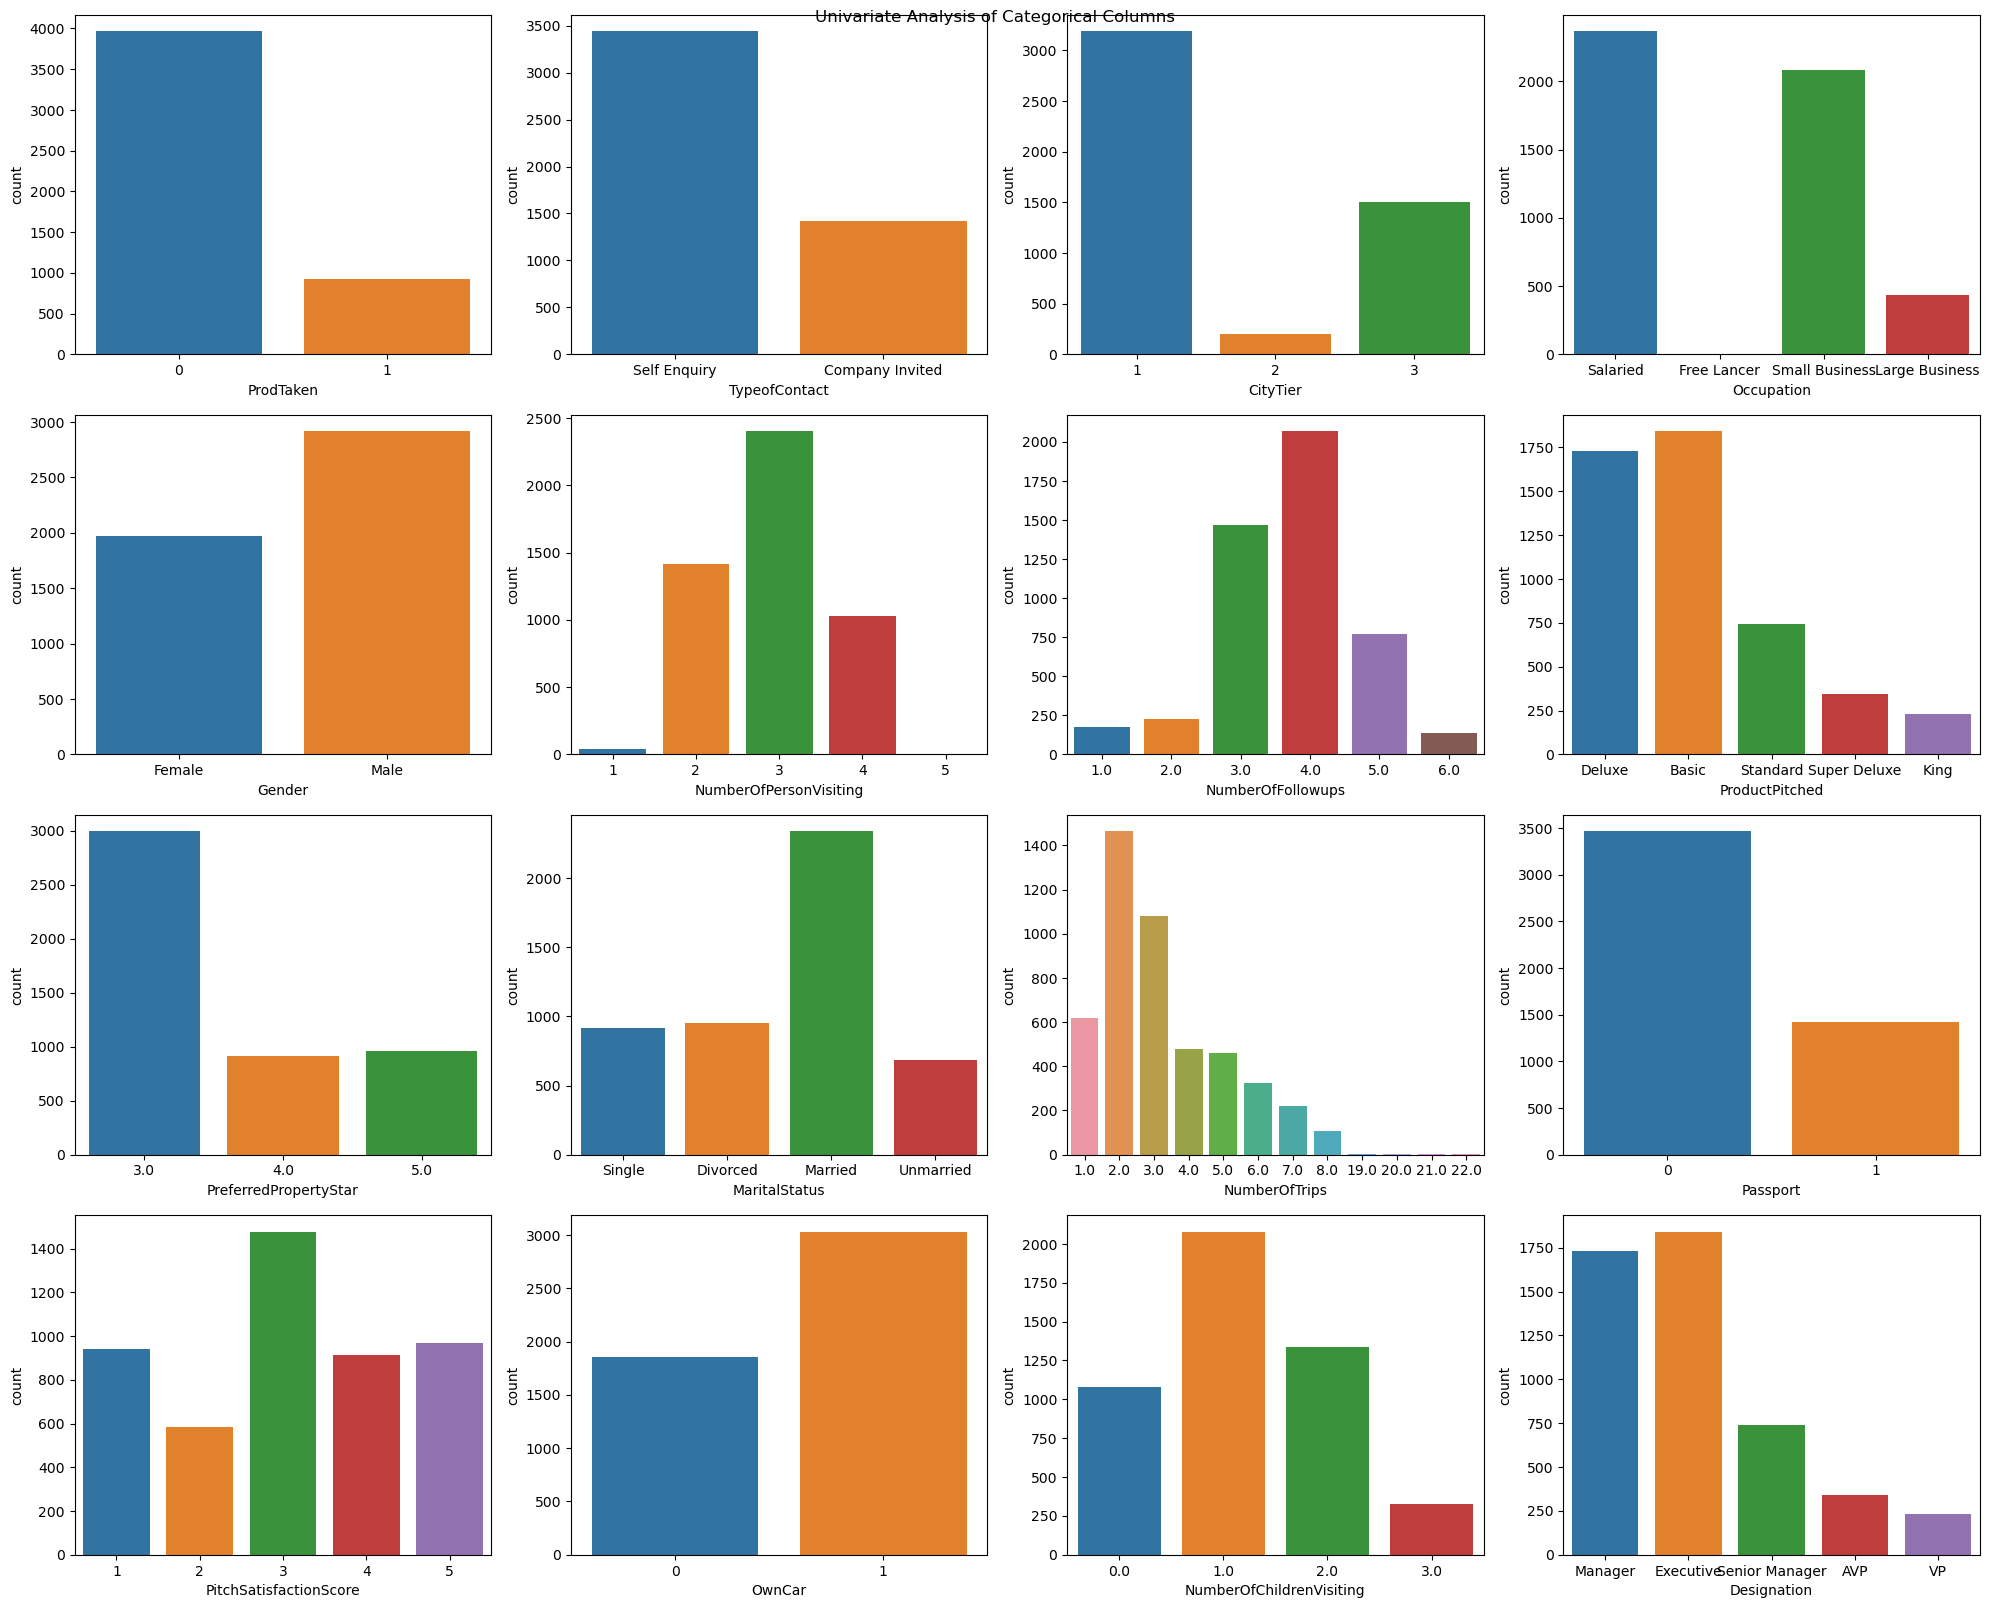

In [12]:
plt.figure(figsize=(20,20))
plt.suptitle('Univariate Analysis of Categorical Columns')
for i in range(0, len(categorical)):
    plt.subplot(5, 4, i+1)
    sns.countplot(x=df[categorical[i]])
    plt.tight_layout()

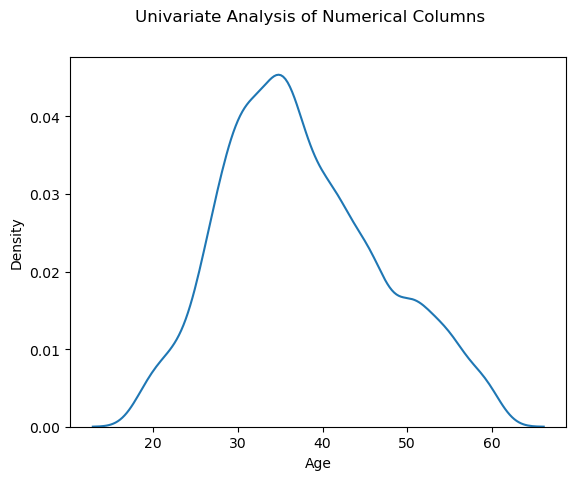

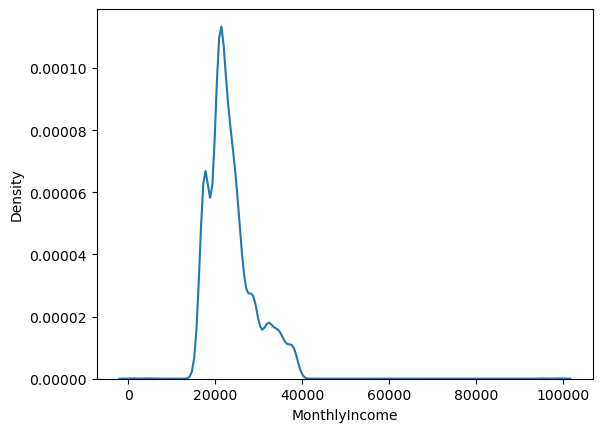

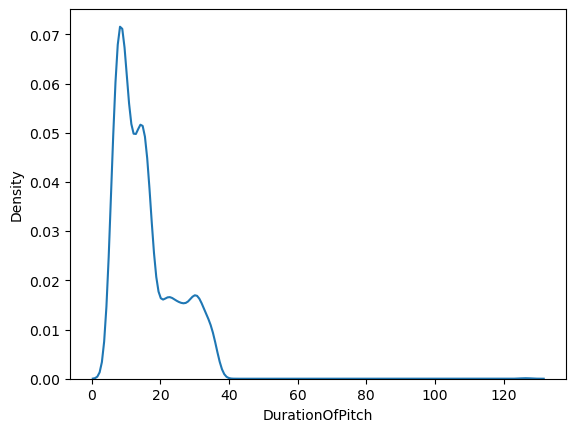

In [13]:
plt.suptitle('Univariate Analysis of Numerical Columns')
for i in range(0, len(numerical)):
    sns.kdeplot(x=df[numerical[i]])
    plt.show()
    

Observations :
1. DurationOfPitch is right skewed.
2. MonthlyIncome has outliers on both sides.
3. Age is normally distributed with no outliers.
4. NumberOfTrips is right skewed.
5. Dataset is unbalanced with ununiform distribution of the classes in the target variable.
6. Most of the people are from tier 1 cities.
7. Type of contact is dominated by Self Enquiry
8. The Occupation column is dominated by Salaried and Small Business and the number of Freelancers is too small.
9. In the Gender column, there are more male than female.
10. The ProductPitched and Designation columns are dominated by 2 categories.
11. The MaritalStatus column is dominated by the Married status.

## Multivariate analysis

In [14]:
for data in categorical:
 print(pd.crosstab(df[data],df['ProdTaken'],margins=True))
 print('***********************************************')

ProdTaken     0    1   All
ProdTaken                 
0          3968    0  3968
1             0  920   920
All        3968  920  4888
***********************************************
ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2837  607  3444
All              3946  917  4863
***********************************************
ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
***********************************************
ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
***********************************************
ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        396

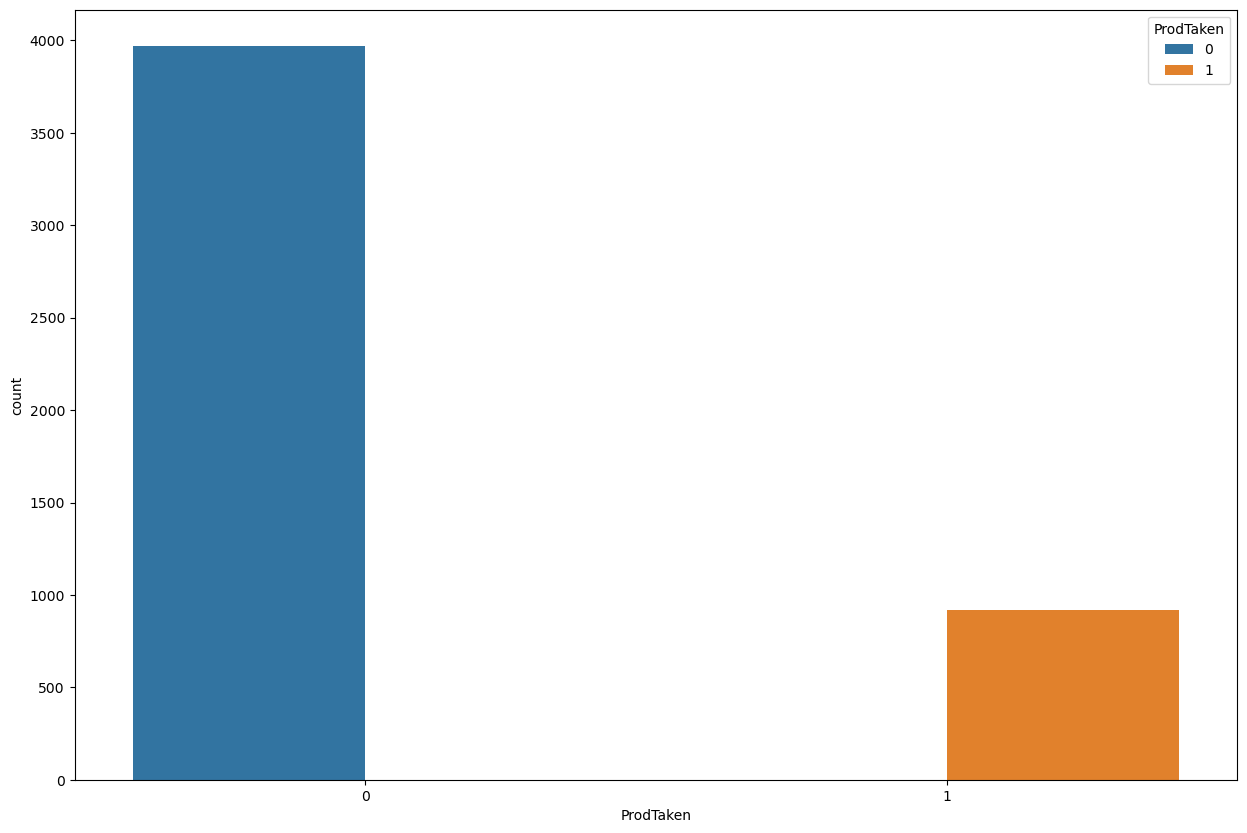

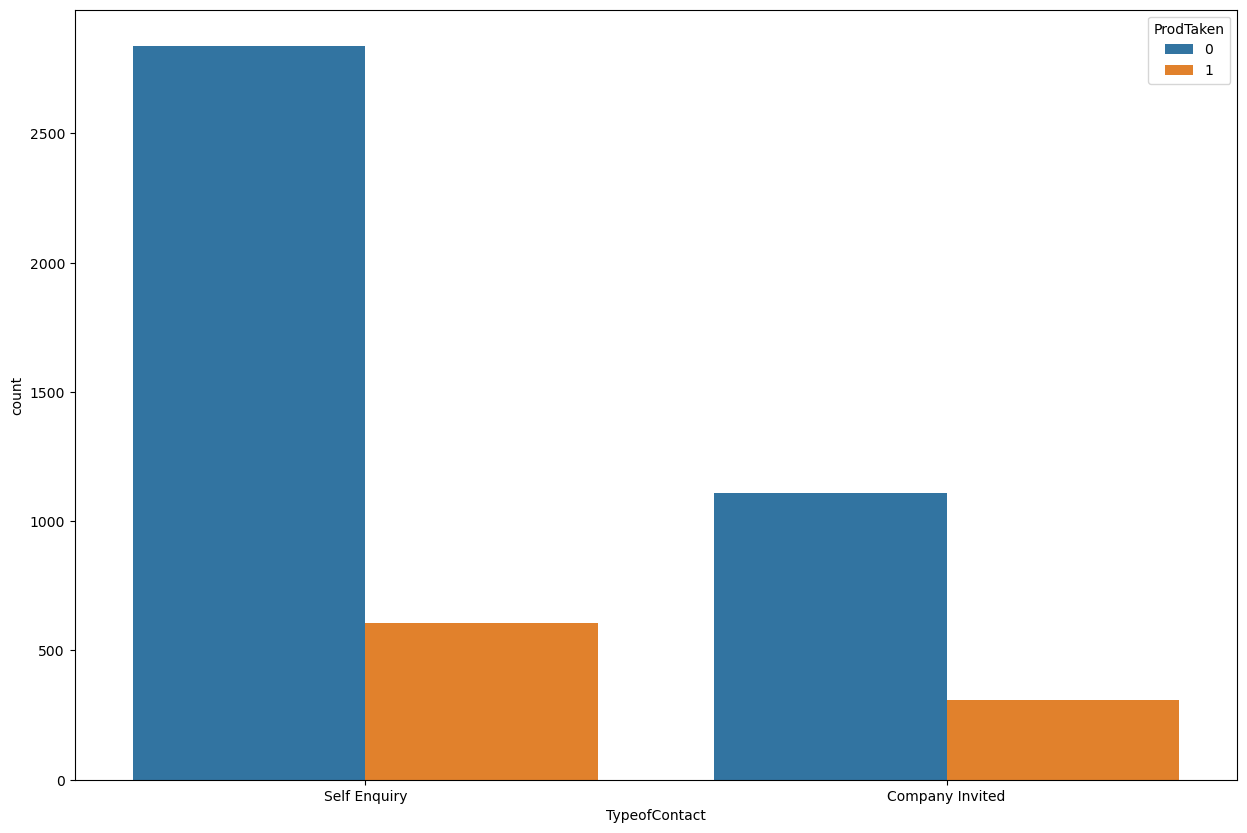

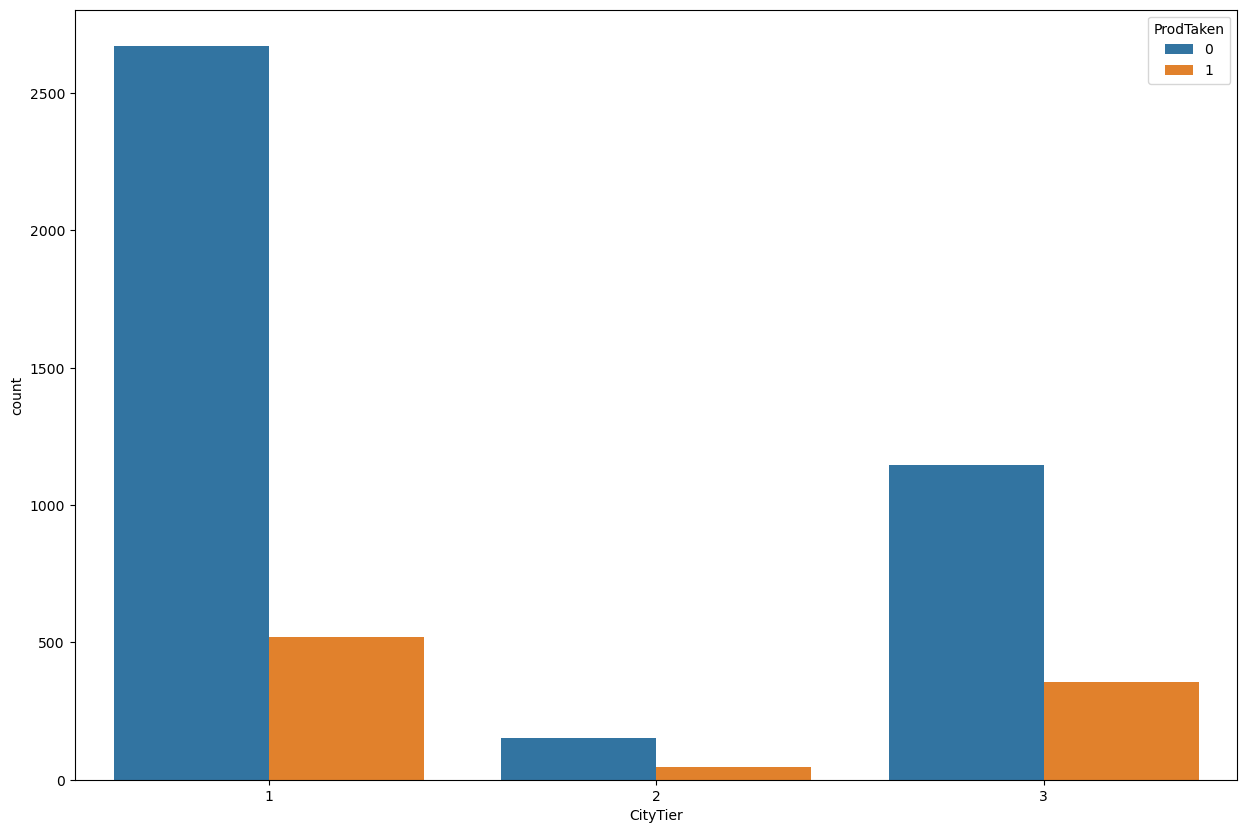

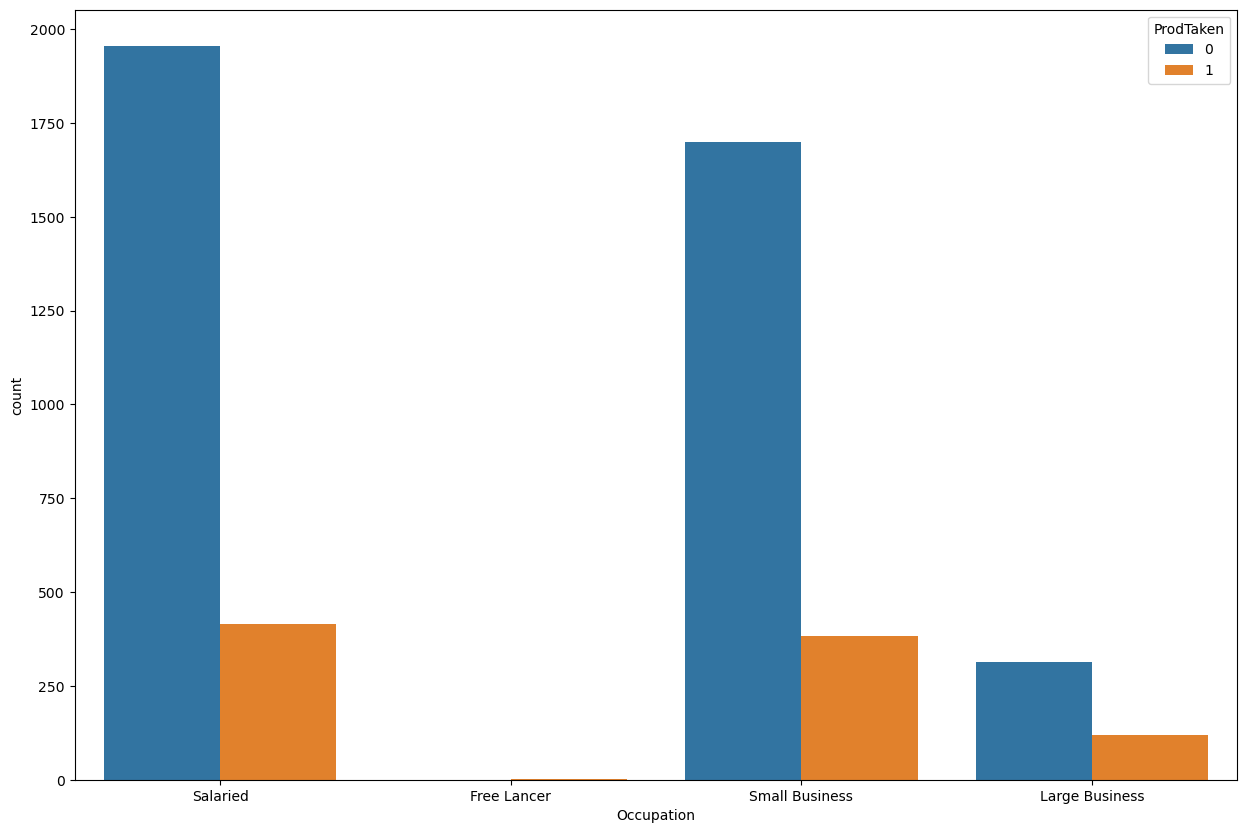

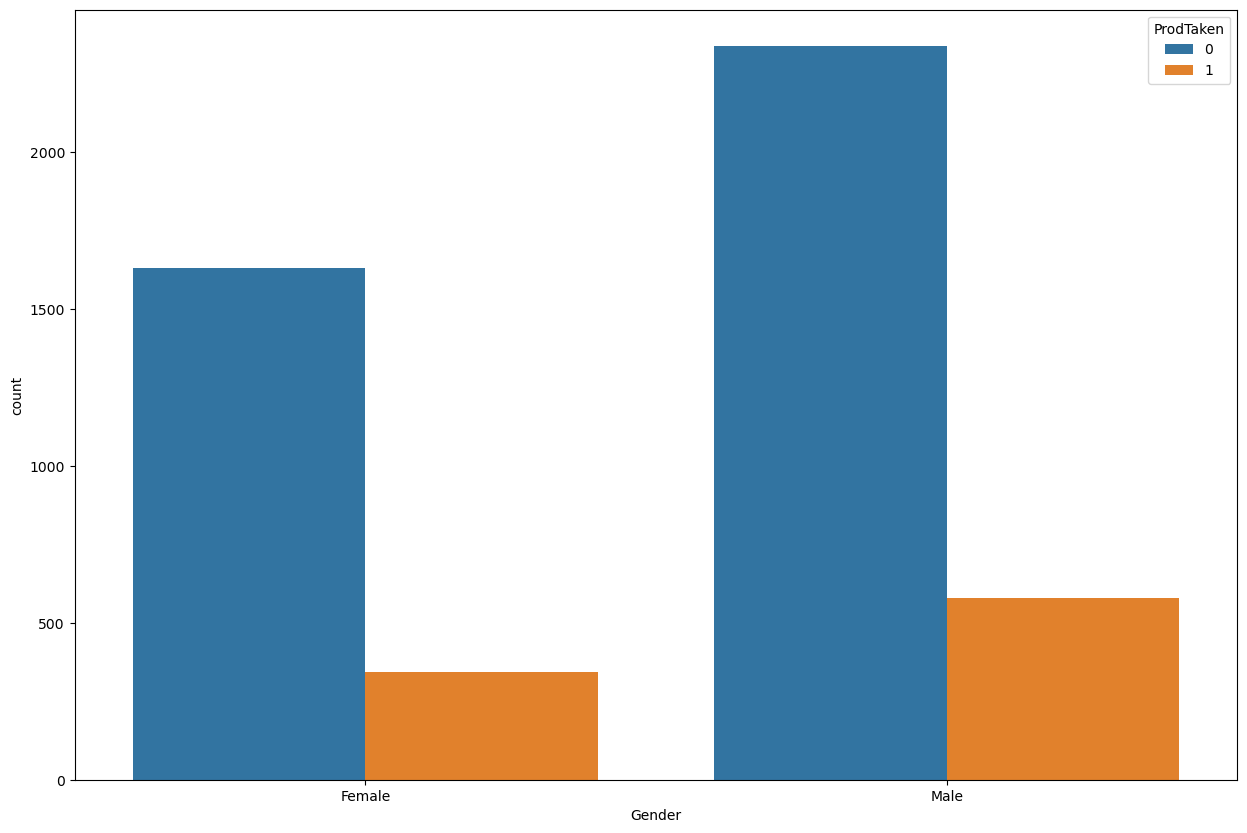

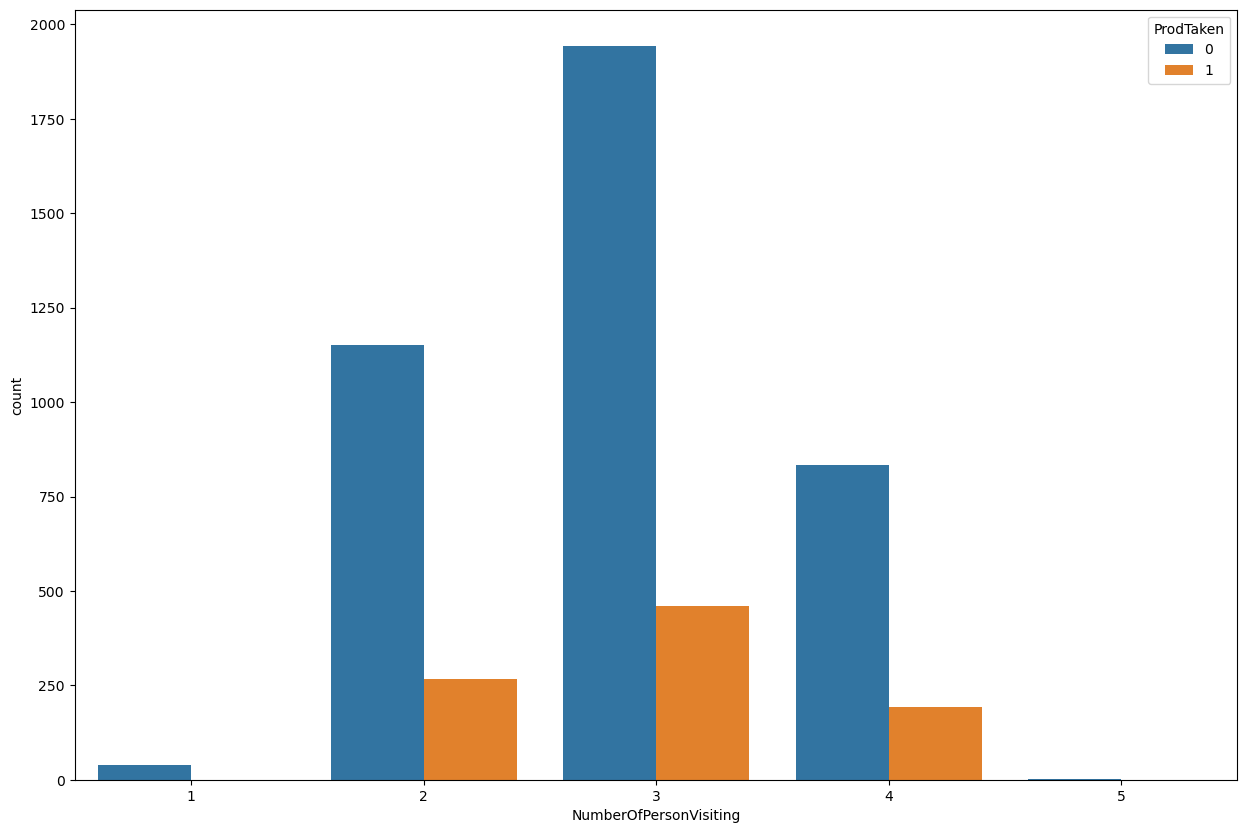

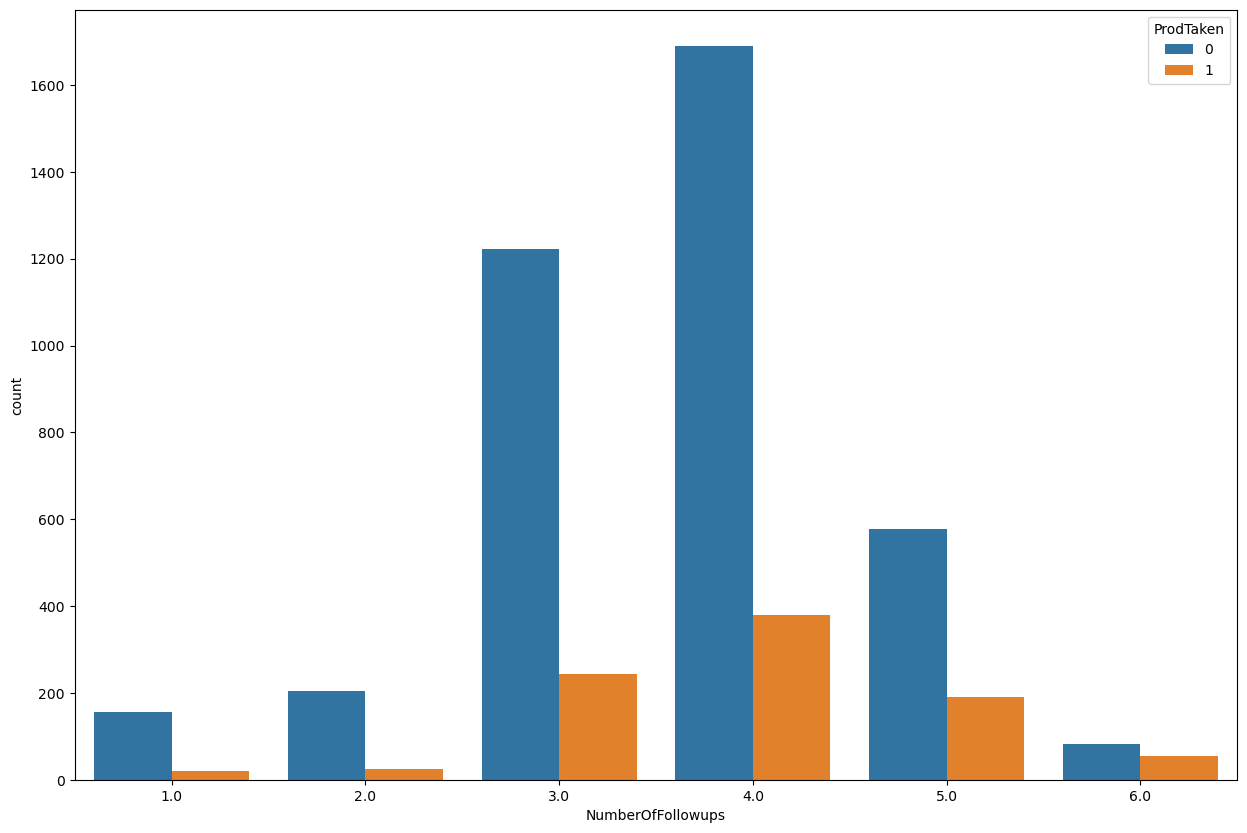

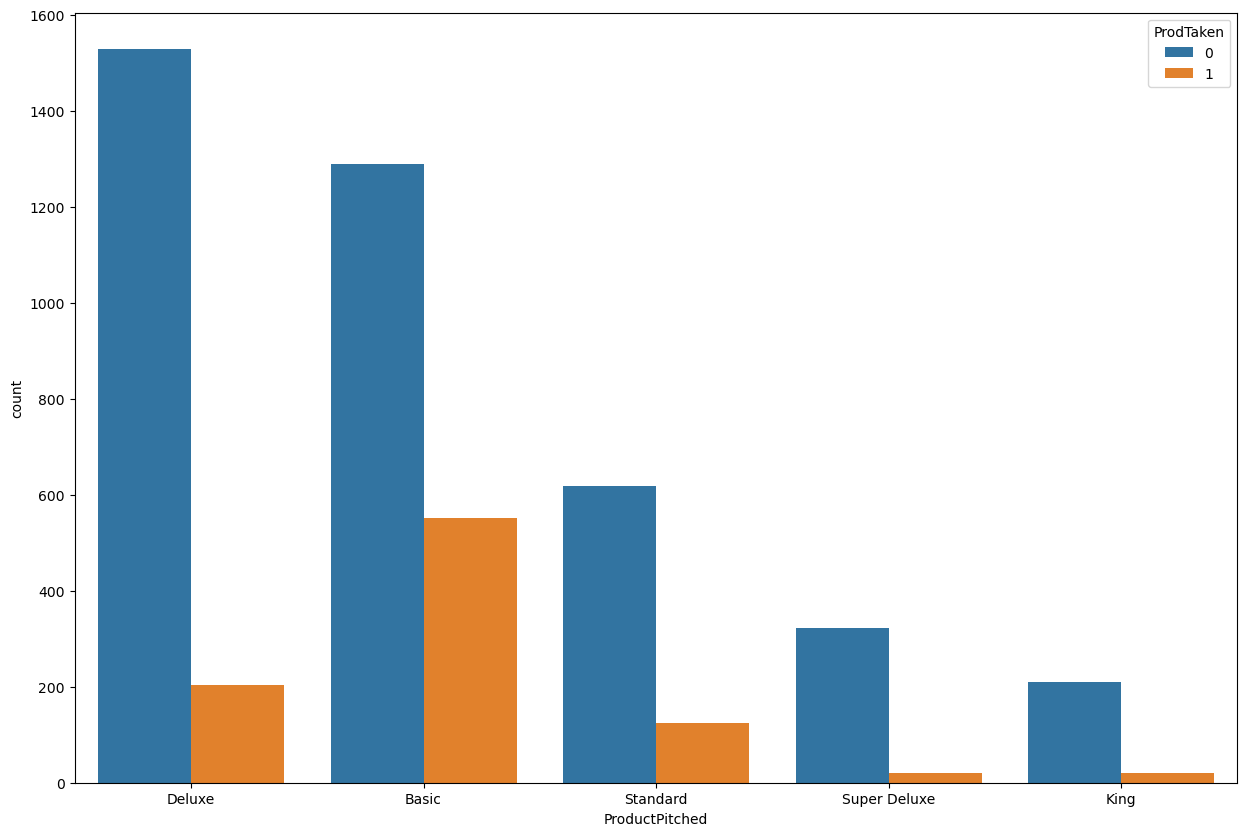

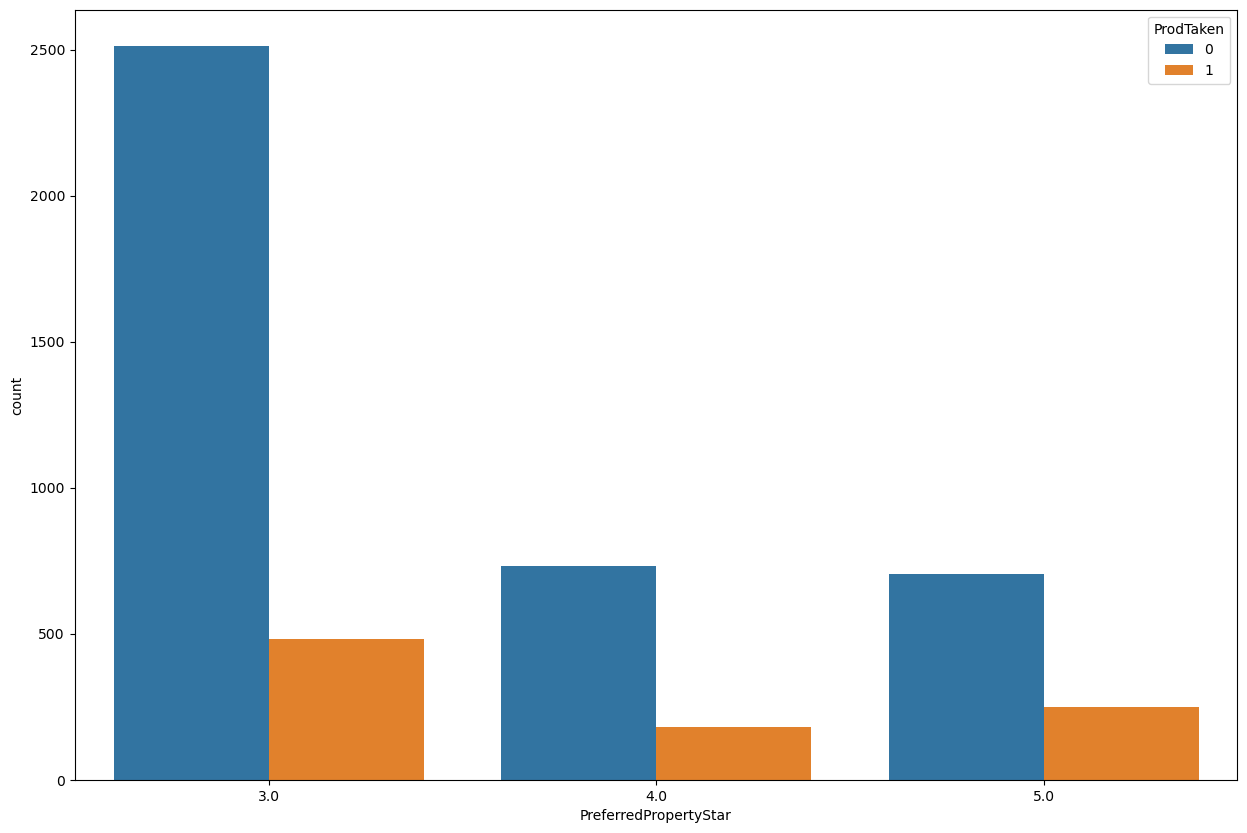

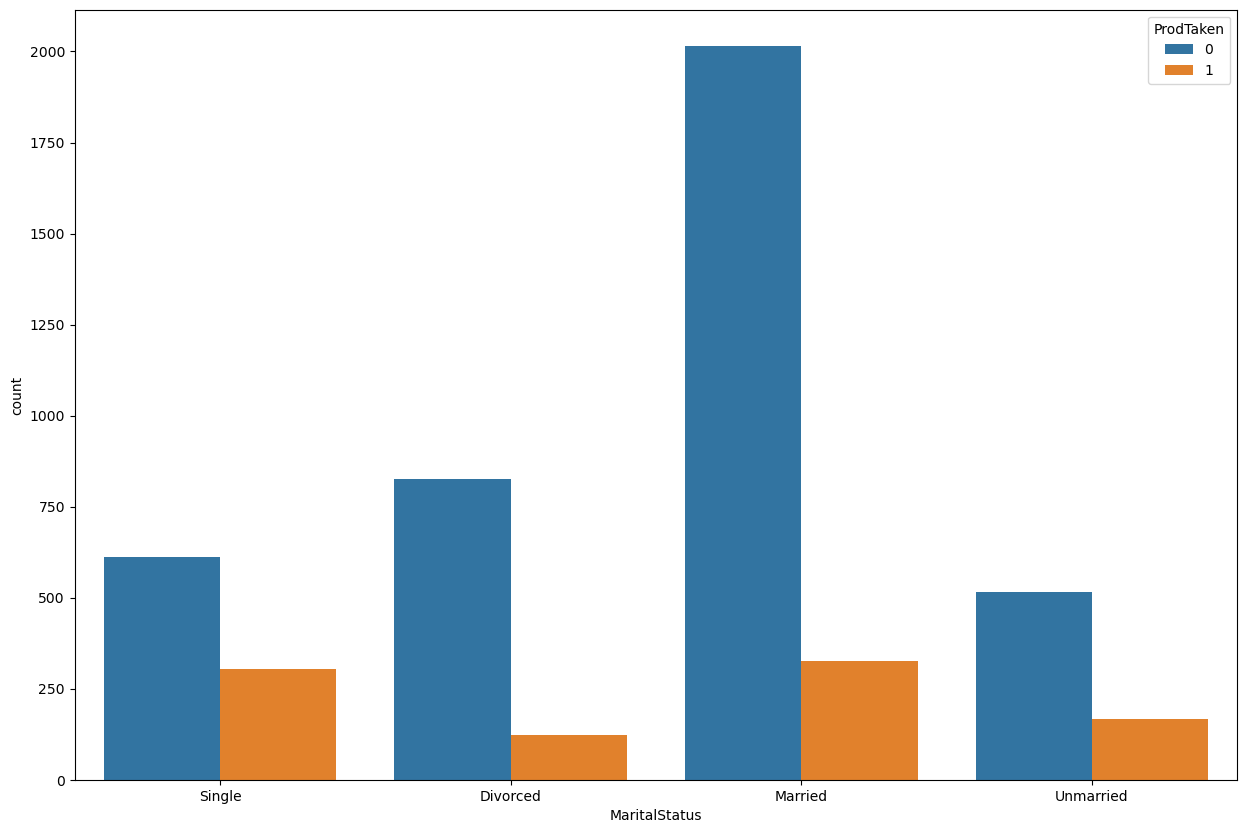

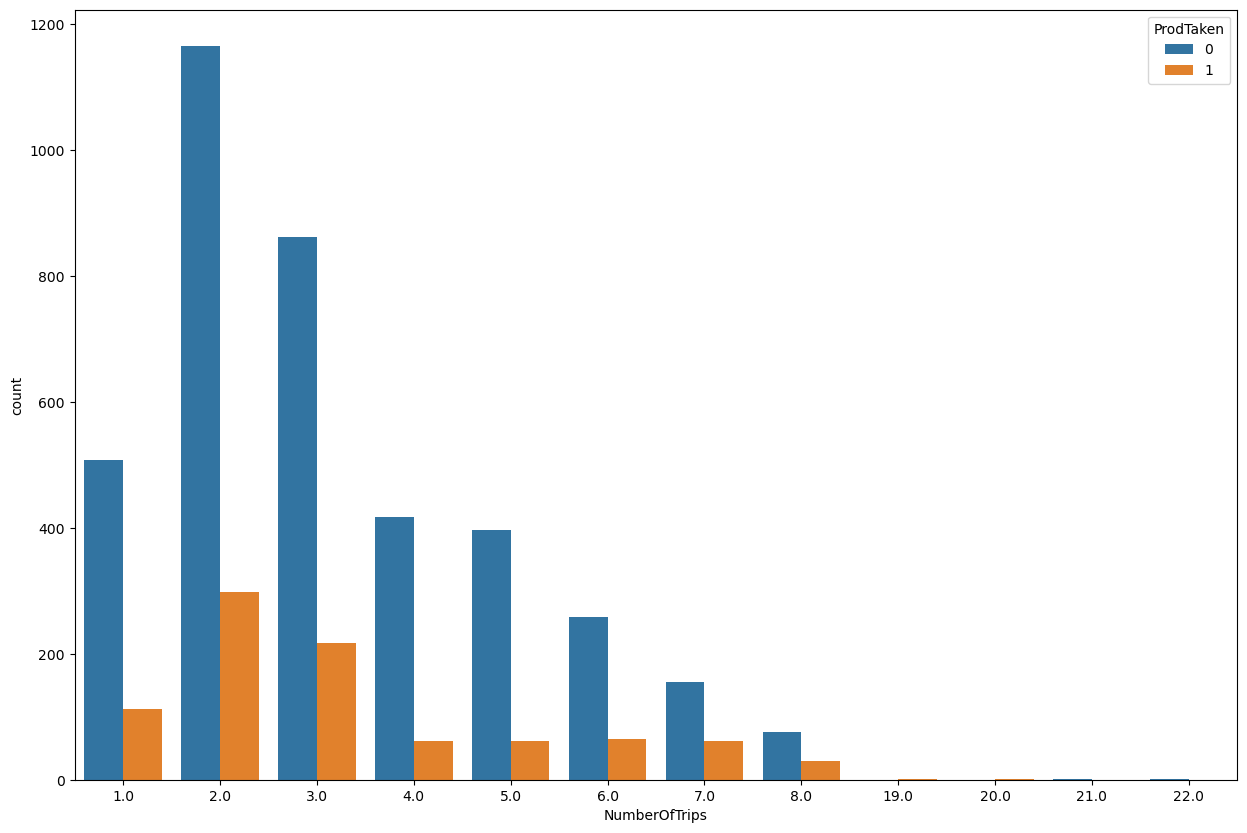

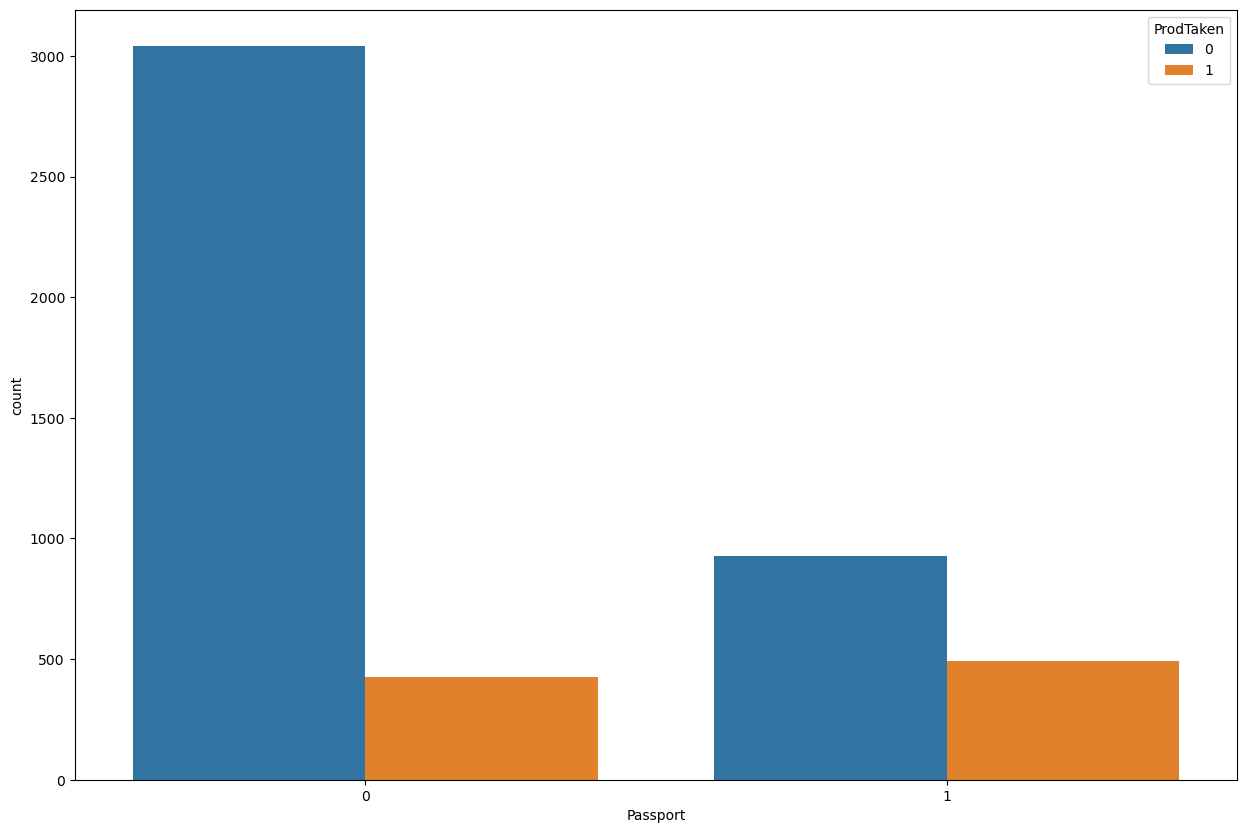

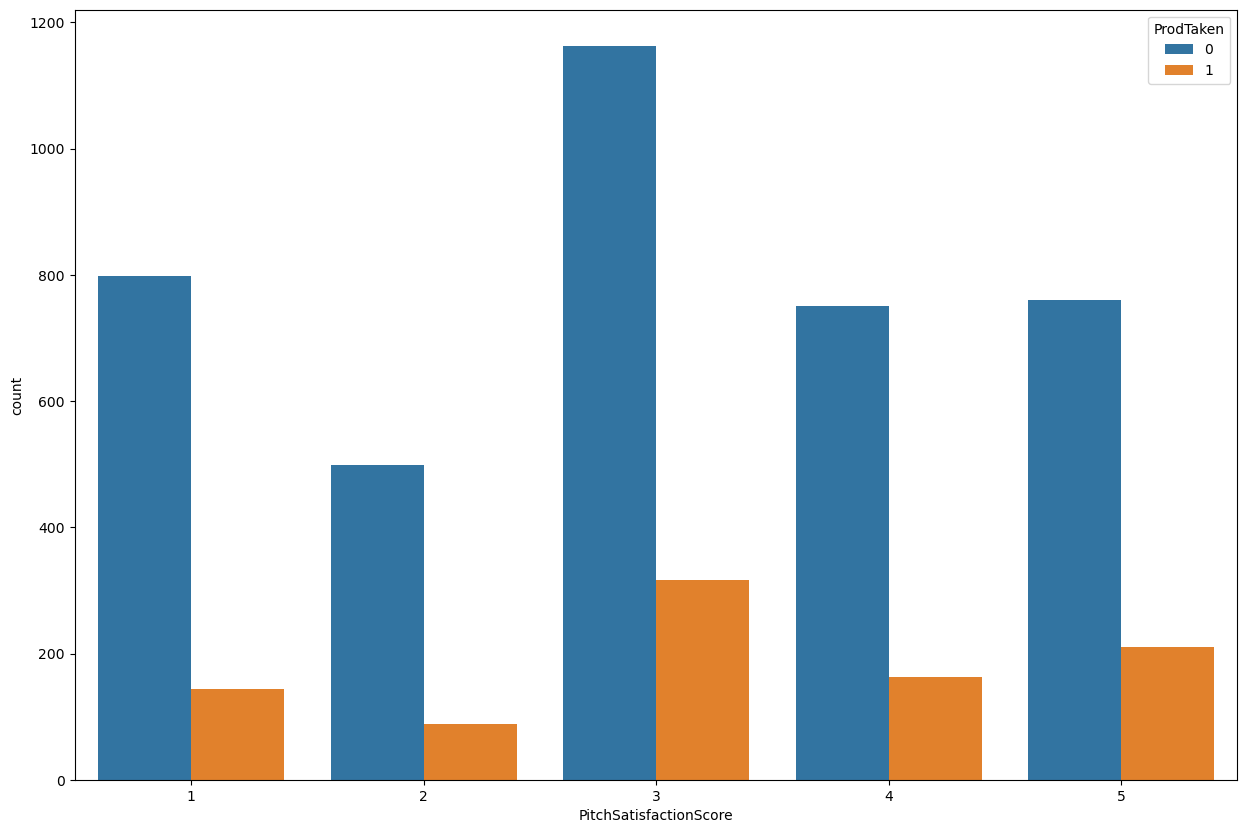

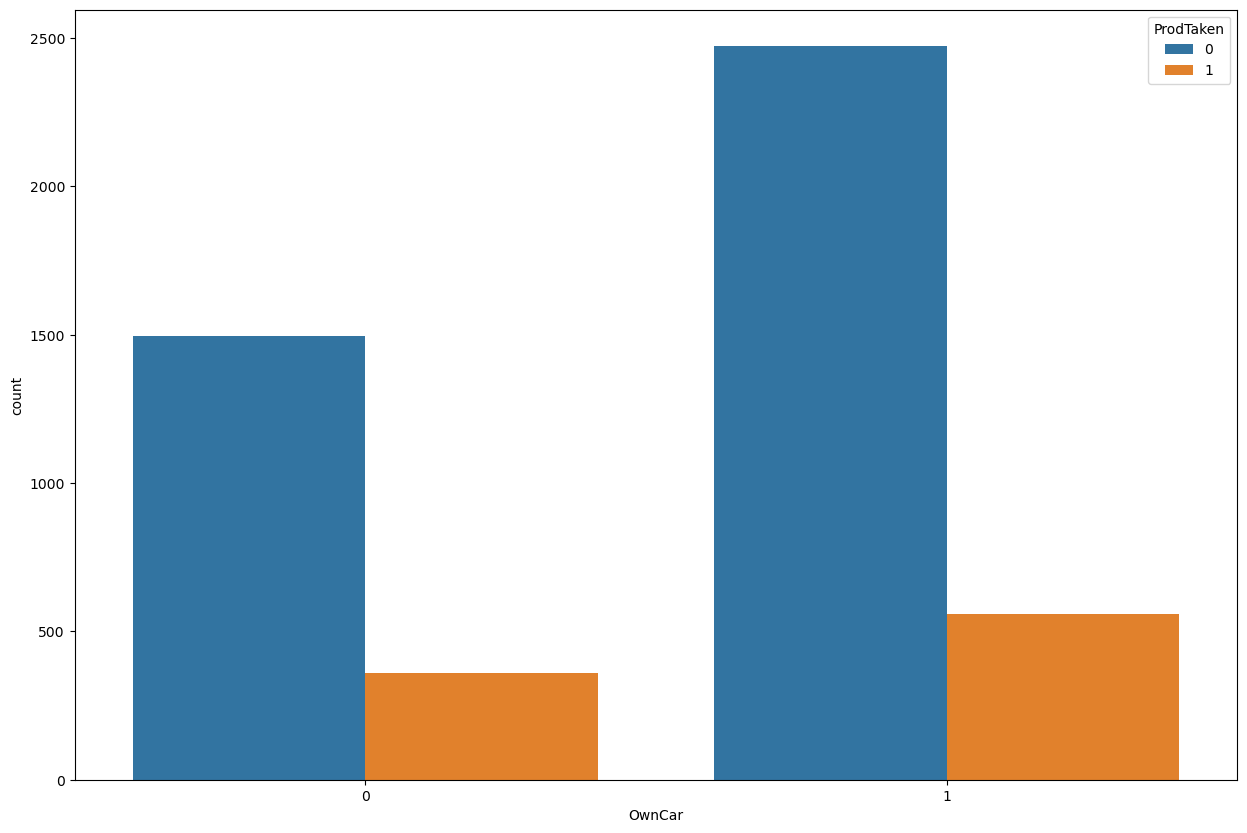

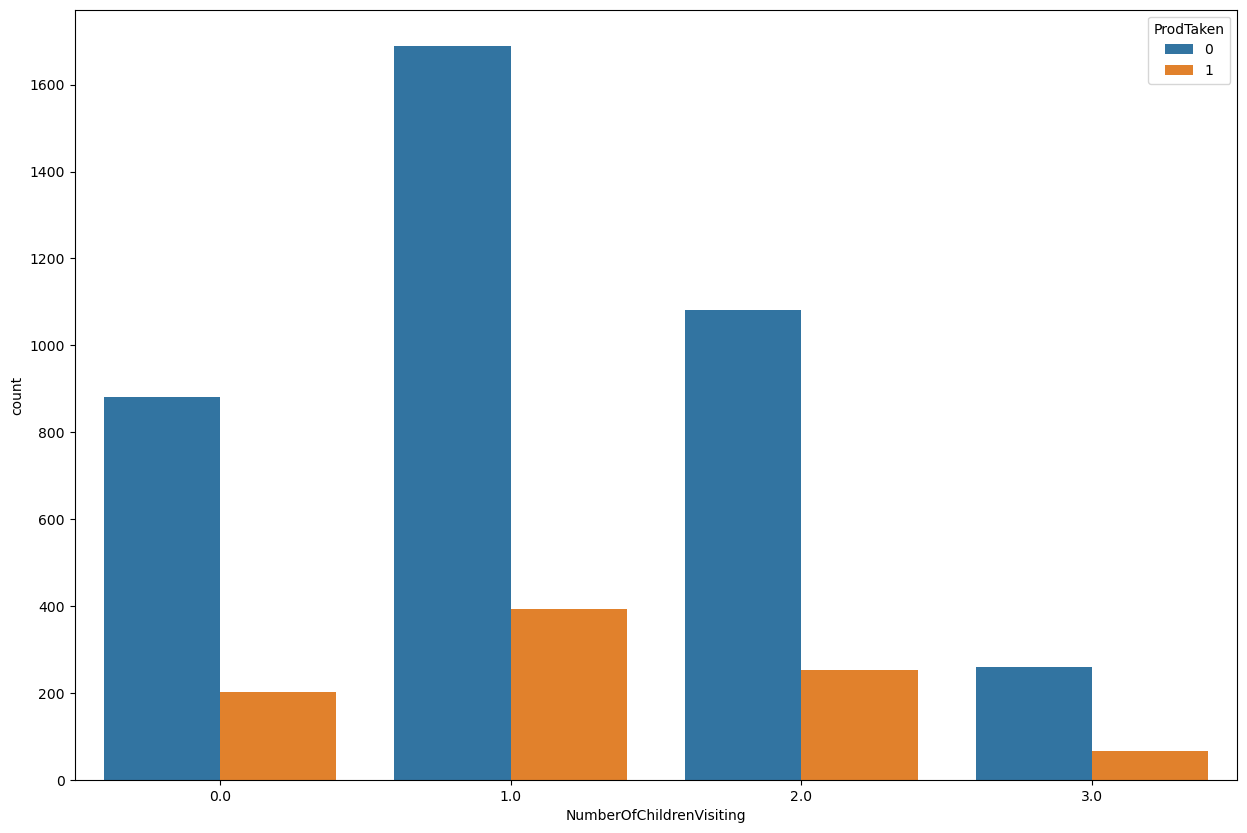

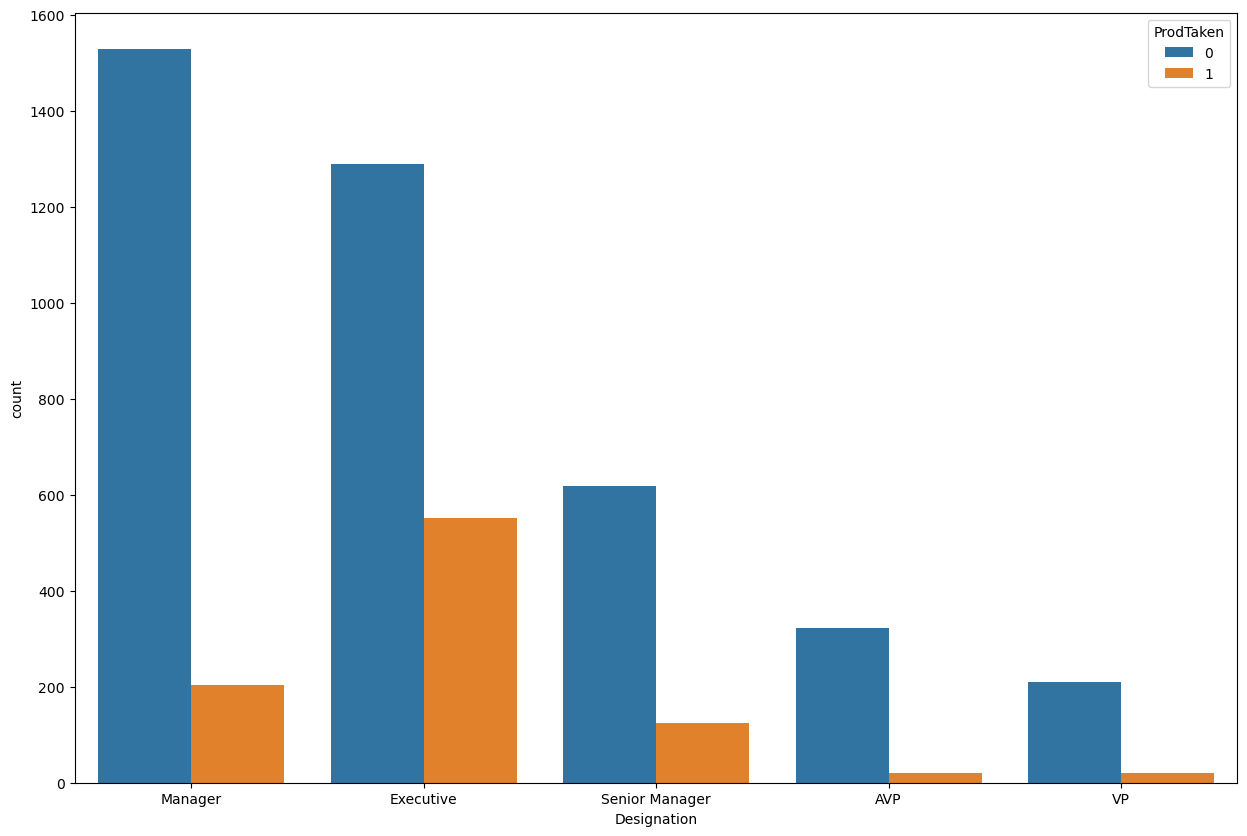

In [15]:
for i in categorical:
 plt.figure(figsize=(15,10))
 sns.countplot(x=i,hue='ProdTaken',data=df)
 
 plt.show()

Observations :
1. Mostly customer visting with 2,3,4 travellers purchased the product
2. Customers who were pitched basic package mostly brought the product
3. Most of the customers who bought the product were Executive
4. Customers who were followed up 4 times had purchased the product
5. Large Business owners have higher chance of purchasing the travel package
6. Single and unmarried people has higher chance of purchasing the travel package
7. Having a passport increased chances of purchasing the package
8. Customers who took 7/8 trips had higher chances of purchaing the packages
9. Customers who contacted through Self Enquiry are more likely to purchase travel packages compared to those who were invited by a company.

In [16]:
import plotly.express as px
for i in numerical:
 fig=px.strip(df,x=i,y='ProdTaken',orientation='h',color='ProdTaken')
 fig.show()

In [17]:
df.corr()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.032127,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833
ProdTaken,0.056506,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,0.032127,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.012975,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.064298,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.604013,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.427539,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.010553,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.224848,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.007974,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545


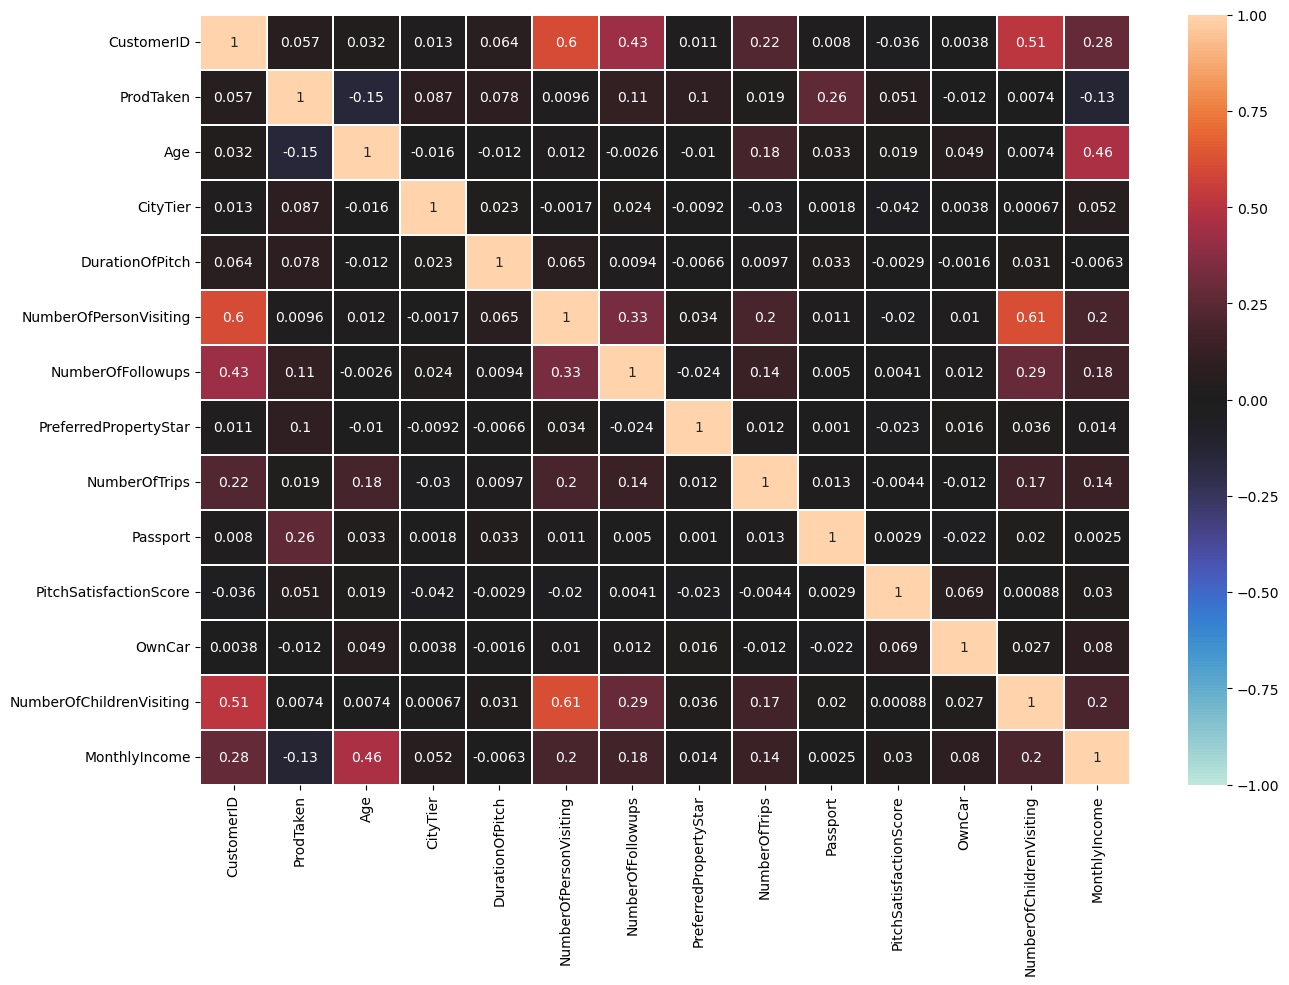

In [18]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot=True,linewidths=0.2,vmax=1,vmin=-1,center=0)
plt.show()

Observations:
1. NumberOfChildrenVisiting and NumberOfPersonVisiting are highly correlated.
2. The target column, ProdTaken, has weak negative correlation with Age and MontlyIncome.
3. The columns NumberOfFollowups and Passport also have weak positive correlation with ProdTaken.

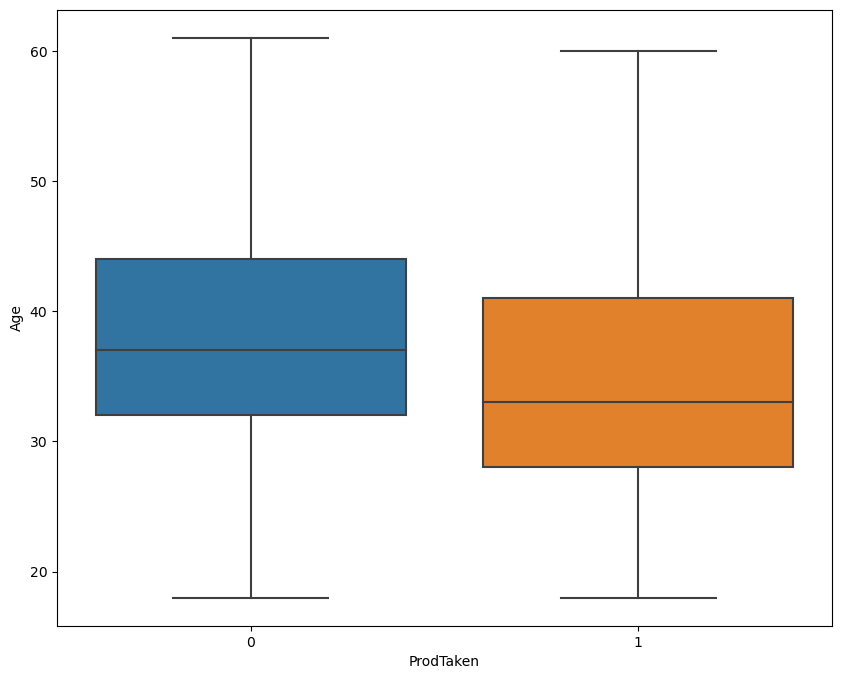

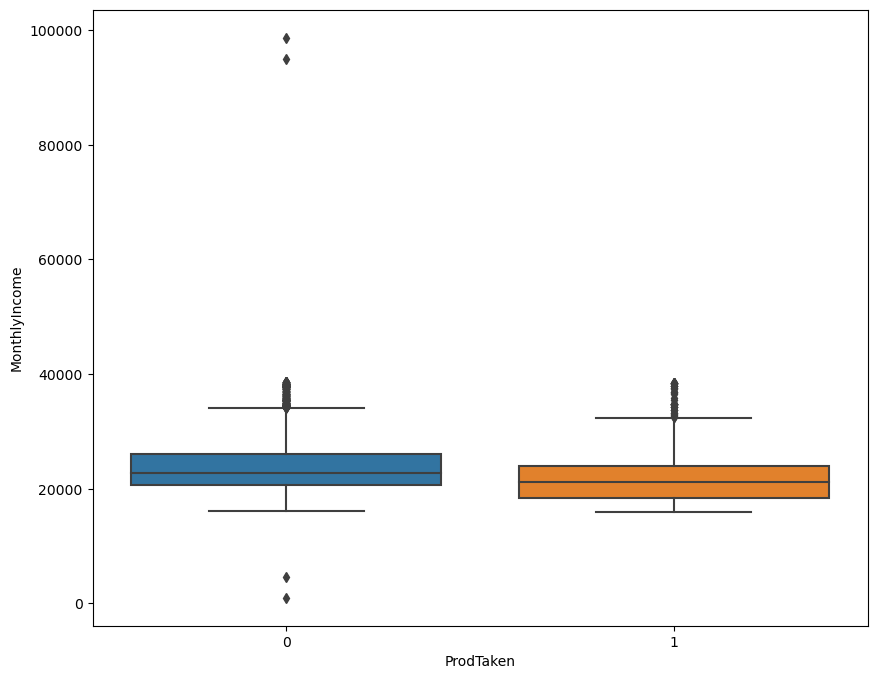

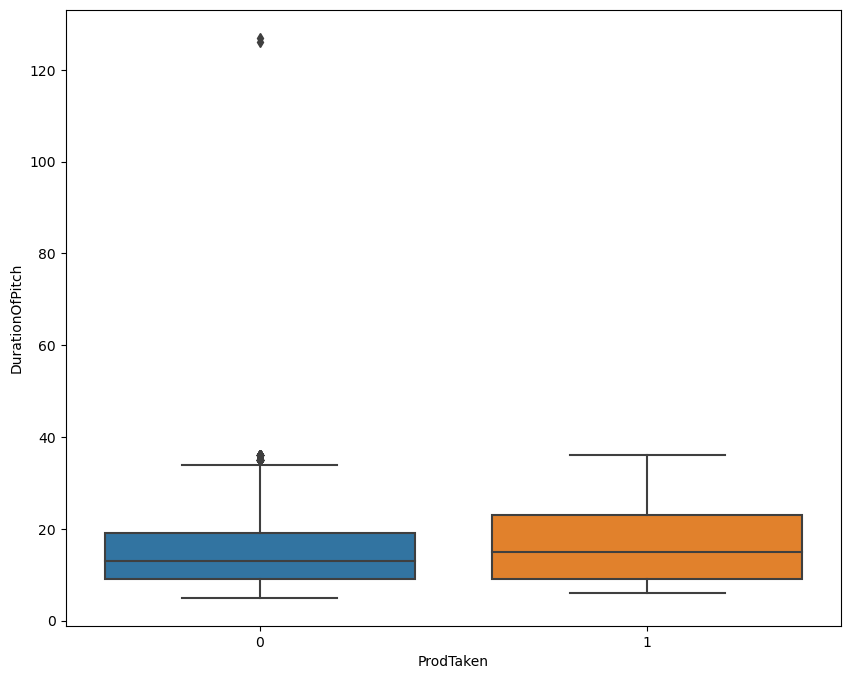

In [19]:
for i in numerical:
 plt.figure(figsize=(10,8))
 sns.boxplot(x=df['ProdTaken'],y=df[i],data=df)
 
 plt.show()

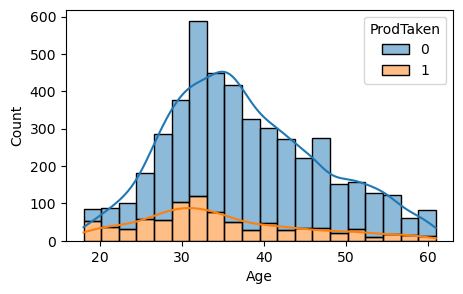

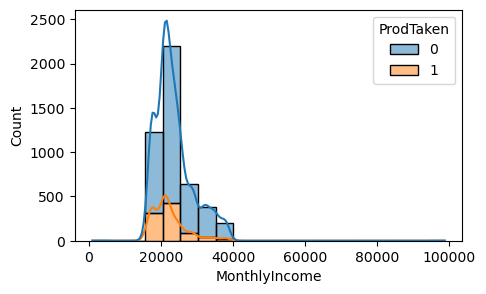

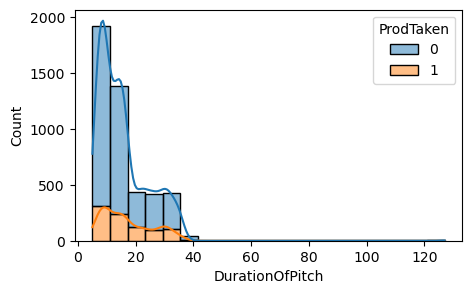

In [20]:
for i in numerical:
 plt.figure(figsize=(5,3))
 sns.histplot(data=df, x=df[i], hue='ProdTaken', bins=20, kde=True, multiple='stack')
 
 plt.show()


Observations :
1. Customers who purchase travel packages are mostly between the ages of 20-35.
2. Sales pitch duration of less than 20 minutes makes it possible for customers to purchase travel packages.
3. Customers with a monthly income ranging from 150,000 to 250,000 are more likely to be interested in purchasing travel packages.

## Business insights

In [21]:
df2=df.copy()

**Which product(s) is/are making customers interested in buying them?**

In [22]:
df_product=df2.groupby(['ProductPitched','ProdTaken'])['CustomerID'].count().reset_index(name="TotalCust").merge(df2.groupby(["ProductPitched"])['CustomerID'].count(),on="ProductPitched")
df_product=df_product[df_product["ProdTaken"]==1].reset_index(drop="True")
df_product["%"]=round(df_product.TotalCust/df_product.CustomerID*100,2)
df_product

,ProductPitched,ProdTaken,TotalCust,CustomerID,%
0,Basic,1,552,1842,29.97
1,Deluxe,1,204,1732,11.78
2,King,1,20,230,8.70
3,Standard,1,124,742,16.71
4,Super Deluxe,1,20,342,5.85


<AxesSubplot:xlabel='ProductPitched', ylabel='%'>

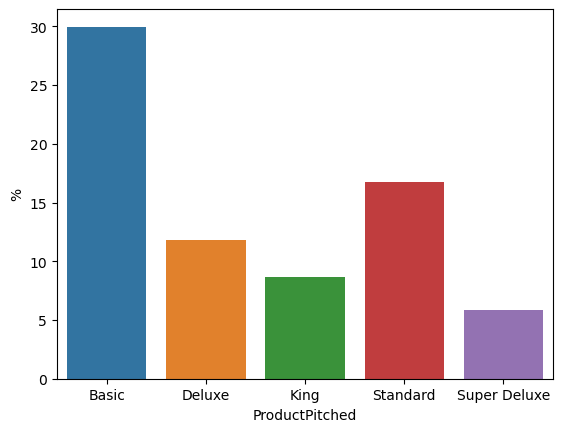

In [23]:
sns.barplot(x=df_product['ProductPitched'],y=df_product['%'])

Observation: Customers are more interested in Basic products than other products most probably because they are cheap. We can offer discounts on products other than Basic during product pitching so that customers also gets interested in buying them.

**Does the number of follow-ups from sales affect customers in purchasing travel packages?**

In [24]:
df_followups=df2.groupby(['NumberOfFollowups','ProdTaken'])['CustomerID'].count().reset_index(name="TotalCust").merge(df2.groupby(["NumberOfFollowups"])['CustomerID'].count(),on="NumberOfFollowups")
df_followups=df_followups[df_followups["ProdTaken"]==1].reset_index(drop="True")
df_followups["%"]=round(df_followups.TotalCust/df_followups.CustomerID*100,2)
df_followups

,NumberOfFollowups,ProdTaken,TotalCust,CustomerID,%
0,1.0,1,20,176,11.36
1,2.0,1,24,229,10.48
2,3.0,1,244,1466,16.64
3,4.0,1,379,2068,18.33
4,5.0,1,191,768,24.87
5,6.0,1,54,136,39.71


<AxesSubplot:xlabel='NumberOfFollowups', ylabel='%'>

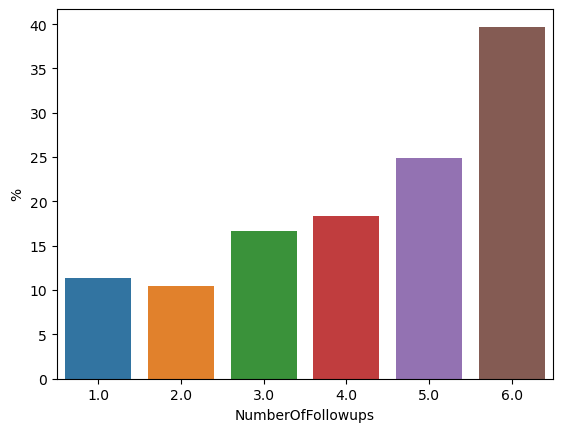

In [25]:
sns.barplot(x=df_followups['NumberOfFollowups'],y=df_followups['%'])

Observation :
Followup the customer after pitching the product atleast 5 times. With more followups customers are more likely to buy the product.

**Which age group is buying more travel packages?**

In [26]:
df2.head(1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0


In [27]:
df2.Age.describe()

count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

In [28]:
def age_group(Age:float) -> str:
  if 18<=Age<=25:
     return 'Youth'
  elif 26<=Age<=45:
     return 'Adult'
  elif 46<=Age<=61:
     return 'Elderly'

df2.insert(3,'AgeGroup',df['Age'].apply(age_group))
df2.head()

,CustomerID,ProdTaken,Age,AgeGroup,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Adult,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Elderly,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Adult,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Adult,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,None,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [29]:
df_age=df2.groupby(['AgeGroup','ProdTaken'])['CustomerID'].count().reset_index(name="TotalCust").merge(df2.groupby(["AgeGroup"])['CustomerID'].count(),on='AgeGroup')
df_age=df_age[df_age["ProdTaken"]==1].reset_index(drop="True")
df_age["%"]=round(df_age.TotalCust/df_age.CustomerID*100,2)
df_age

,AgeGroup,ProdTaken,TotalCust,CustomerID,%
0,Adult,1,589,3341,17.63
1,Elderly,1,144,974,14.78
2,Youth,1,143,347,41.21


<AxesSubplot:xlabel='AgeGroup', ylabel='%'>

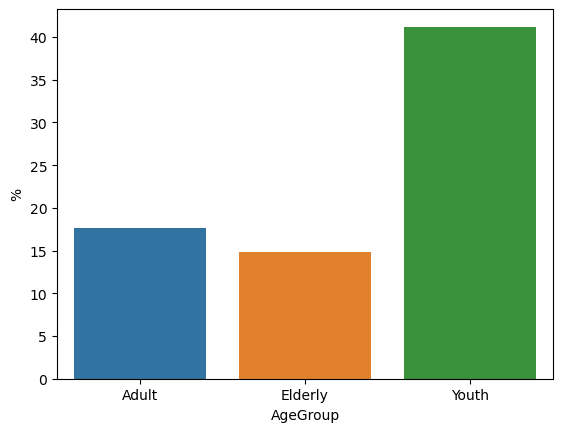

In [30]:
sns.barplot(x=df_age['AgeGroup'],y=df_age['%'])

Observations :
Young age group are more likely to buy the product. We the company needs to pitch more of the young ones in the age 18-25.

**Does having passports increases the probability of purchasing the product?**

In [31]:
df_passport=df2.groupby(['Passport','ProdTaken'])['CustomerID'].count().reset_index(name="TotalCust").merge(df2.groupby(['Passport'])['CustomerID'].count(),on='Passport')
df_passport=df_passport[df_passport["ProdTaken"]==1].reset_index(drop="True")
df_passport["%"]=round(df_passport.TotalCust/df_passport.CustomerID*100,2)
df_passport

,Passport,ProdTaken,TotalCust,CustomerID,%
0,0,1,426,3466,12.29
1,1,1,494,1422,34.74


<AxesSubplot:xlabel='Passport', ylabel='%'>

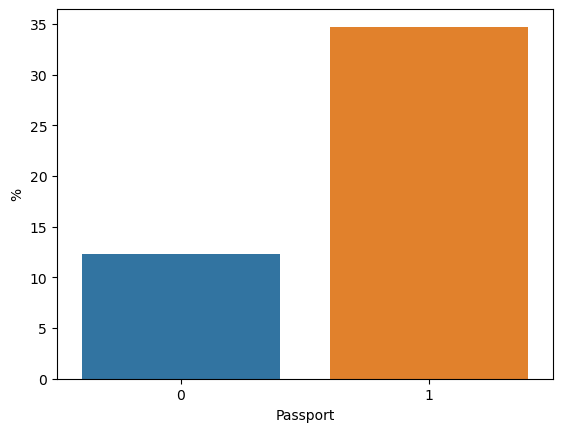

In [32]:
sns.barplot(x=df_passport['Passport'],y=df_passport['%'])

Observation : Having passport increases the probability.

# Data Preprocessing

In [33]:
df.head(1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0


**Removing the column that is not required anymore**

In [34]:
df.drop(['CustomerID'],axis=1,inplace=True)
df.head(1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0


**Handling missing values**

In [35]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

There are numerous missing values.

In [36]:
df['TypeofContact'].mode()

0    Self Enquiry
dtype: object

In [37]:
#filling up the null values of TypeOfContact with the mode of the variable.

df['TypeofContact']=df['TypeofContact'].fillna('Self Enquiry')

In [38]:
#filling up the null values with the median after grouping it up with respect to the variables Gender and ProductPitched because these are the values which may influence NumberOfFollowUps

df['NumberOfFollowups']=df.groupby(['Gender','ProductPitched'])['NumberOfFollowups'].apply(lambda x:x.fillna(x.median()))

In [39]:
#filling up the null values with the median after grouping it up with respect to the variable Designation because these are the values which may influence PreferredPropertyStar

df['PreferredPropertyStar']=df.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))

In [40]:
#filling up the null values with the median after grouping it up with respect to the variables ProductPitched and NumberOfFollowups because these are the values which may influence DurationOfPitch

df["DurationOfPitch"] = df.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(lambda x: x.fillna(x.median()))

In [41]:
#filling up the null values with the median

df['NumberOfTrips']=df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())

In [42]:
#filling up the null values with 0 because may be there are no children visiting

df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(0)

In [43]:
#filling up the null values with mean

df["Age"] = df["Age"].fillna(df['Age'].mean())

In [44]:
#filling up the null values with the median after grouping it up with respect to the variables Occupation,Designation because these are the values which may influence MonthlyIncome

df["MonthlyIncome"]=df.groupby(["Occupation",'Designation'])["MonthlyIncome"].apply(lambda x: x.fillna(x.median()))

In [45]:
#checking if there are any more null values

df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [46]:
df.shape

(4888, 19)

**Handling the outliers**

Removing the outliers in MonthlyIncome

In [47]:
df.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,3.0,Divorced,2.0,0,2,1,2.0,VP,38677.0
4104,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,3.0,Married,2.0,0,1,1,3.0,VP,38677.0
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,3.0,Married,3.0,0,4,1,1.0,VP,38651.0


In [48]:
df.sort_values(by=["MonthlyIncome"],ascending = False).tail(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
727,0,18.0,Company Invited,1,11.0,Salaried,Male,3,3.0,Basic,3.0,Single,2.0,0,2,1,1.0,Executive,16051.0
1983,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Basic,3.0,Single,2.0,1,5,1,1.0,Executive,16009.0
513,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Basic,3.0,Single,2.0,1,5,0,0.0,Executive,16009.0
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0


In [49]:
df.drop(index=df[(df.MonthlyIncome>40000.0) | (df.MonthlyIncome<10000.0)].index,inplace=True)

Removing the outliers present in NumberOfTrips

In [50]:
df.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
2757,0,34.0,Company Invited,1,12.0,Salaried,Female,4,4.0,Standard,4.0,Divorced,8.0,0,3,1,3.0,Senior Manager,30556.0


In [51]:
df.drop(index=df[df.NumberOfTrips>10].index,inplace=True)

Removing the outliers present in DurationOfPitch

In [52]:
df.sort_values(by=["DurationOfPitch"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3878,0,53.000000,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0
1434,0,37.622265,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
4118,1,39.000000,Self Enquiry,1,36.0,Small Business,Male,4,4.0,Deluxe,5.0,Married,2.0,1,3,1,3.0,Manager,25351.0
2868,0,58.000000,Self Enquiry,3,36.0,Small Business,Male,3,5.0,Super Deluxe,3.0,Married,5.0,0,3,0,1.0,AVP,32796.0
3975,0,39.000000,Company Invited,1,36.0,Salaried,Female,3,4.0,Deluxe,3.0,Single,3.0,0,3,1,1.0,Manager,21084.0


In [53]:
df.drop(index=df[df.DurationOfPitch>40].index,inplace=True)

In [54]:
df.shape

(4878, 19)

## Feature Engineering

**Creating a new column**

In [55]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

Based on the information provided, i assume that Customer interaction data will not be available for new and potiental customers so dropping columns related to customer interaction

In [56]:
X=df.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1)
Y=df['ProdTaken']
print(X.shape)
print(Y.shape)

(4878, 13)
(4878,)


**Finding out columns that needs to be encoded**

In [57]:
columns_to_encode= []
for i in X.columns:
    if df[i].nunique() <20:
        columns_to_encode.append(i)
        
columns_to_encode

['TypeofContact',
 'CityTier',
 'Occupation',
 'Gender',
 'PreferredPropertyStar',
 'MaritalStatus',
 'NumberOfTrips',
 'Passport',
 'OwnCar',
 'Designation',
 'TotalVisiting']

**Feature Encoding**

In [58]:
df_encoded=pd.get_dummies(X,columns=columns_to_encode)
X=df_encoded
X

,Age,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,CityTier_1,CityTier_2,CityTier_3,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,PreferredPropertyStar_3.0,PreferredPropertyStar_4.0,PreferredPropertyStar_5.0,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,NumberOfTrips_1.0,NumberOfTrips_2.0,NumberOfTrips_3.0,NumberOfTrips_4.0,NumberOfTrips_5.0,NumberOfTrips_6.0,NumberOfTrips_7.0,NumberOfTrips_8.0,Passport_0,Passport_1,OwnCar_0,OwnCar_1,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,TotalVisiting_1.0,TotalVisiting_2.0,TotalVisiting_3.0,TotalVisiting_4.0,TotalVisiting_5.0,TotalVisiting_6.0,TotalVisiting_7.0
0,41.000000,20993.0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,49.000000,20130.0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,37.000000,17090.0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,33.000000,17909.0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0
4,37.622265,18468.0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.000000,26576.0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4884,28.000000,21212.0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4885,52.000000,31820.0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4886,19.000000,20289.0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


In [59]:
X.shape


(4878, 44)

In [60]:
Y.value_counts()


0    3960
1     918
Name: ProdTaken, dtype: int64

# Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [62]:
X_train.shape, X_test.shape

((3902, 44), (976, 44))

In [63]:
Y_train.value_counts()

0    3168
1     734
Name: ProdTaken, dtype: int64

In [64]:
Y_test.value_counts()

0    792
1    184
Name: ProdTaken, dtype: int64

The output classes vary a lot so we have to do upsampling later.

# Feature Scaling

Scaling required variables using standard scaler.

In [65]:
X_train.head()

,Age,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,CityTier_1,CityTier_2,CityTier_3,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,PreferredPropertyStar_3.0,PreferredPropertyStar_4.0,PreferredPropertyStar_5.0,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,NumberOfTrips_1.0,NumberOfTrips_2.0,NumberOfTrips_3.0,NumberOfTrips_4.0,NumberOfTrips_5.0,NumberOfTrips_6.0,NumberOfTrips_7.0,NumberOfTrips_8.0,Passport_0,Passport_1,OwnCar_0,OwnCar_1,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,TotalVisiting_1.0,TotalVisiting_2.0,TotalVisiting_3.0,TotalVisiting_4.0,TotalVisiting_5.0,TotalVisiting_6.0,TotalVisiting_7.0
3724,38.0,22749.0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1159,39.0,20042.0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3640,42.0,25760.0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4864,32.0,28530.0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2691,35.0,24635.0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X_train['Age'].values.reshape(-1,1))
X_train['Age'] = scaler.transform(X_train['Age'].values.reshape(-1, 1))
X_test['Age'] = scaler.transform(X_test['Age'].values.reshape(-1, 1))

scaler.fit(X_train['MonthlyIncome'].values.reshape(-1,1))
X_train['MonthlyIncome'] = scaler.transform(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_test['MonthlyIncome'] = scaler.transform(X_test['MonthlyIncome'].values.reshape(-1, 1))

In [67]:
X_train.head()

,Age,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,CityTier_1,CityTier_2,CityTier_3,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,PreferredPropertyStar_3.0,PreferredPropertyStar_4.0,PreferredPropertyStar_5.0,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,NumberOfTrips_1.0,NumberOfTrips_2.0,NumberOfTrips_3.0,NumberOfTrips_4.0,NumberOfTrips_5.0,NumberOfTrips_6.0,NumberOfTrips_7.0,NumberOfTrips_8.0,Passport_0,Passport_1,OwnCar_0,OwnCar_1,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,TotalVisiting_1.0,TotalVisiting_2.0,TotalVisiting_3.0,TotalVisiting_4.0,TotalVisiting_5.0,TotalVisiting_6.0,TotalVisiting_7.0
3724,0.038715,-0.149555,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1159,0.148572,-0.689198,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3640,0.478142,0.450690,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4864,-0.620425,1.002892,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2691,-0.290855,0.226421,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


## Handling imbalanced data

In [68]:
print('Before applying SMOTE algorithm the value count for train set outputs')
Y_train.value_counts()

Before applying SMOTE algorithm the value count for train set outputs


0    3168
1     734
Name: ProdTaken, dtype: int64

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5,random_state=42)
X_train,Y_train = smote.fit_resample(X_train,Y_train)

In [70]:
print('After applying SMOTE algorithm the value count for train set outputs')
Y_train.value_counts()

After applying SMOTE algorithm the value count for train set outputs


0    3168
1    1584
Name: ProdTaken, dtype: int64

# Model fitting and evaluation

In our case, we aim to predict whether customers will purchase travel packages based on the available data. There may still be potential customers who can be converted to purchase travel packages, so we will focus on the evaluation metric of Accuracy, where we want to consider the accuracy of the predictions.

## 1. Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [72]:
lr_Y_train_pred=lr.predict(X_train)
lr_Y_test_pred=lr.predict(X_test)

The accuracy score for train data is: 0.8659511784511784


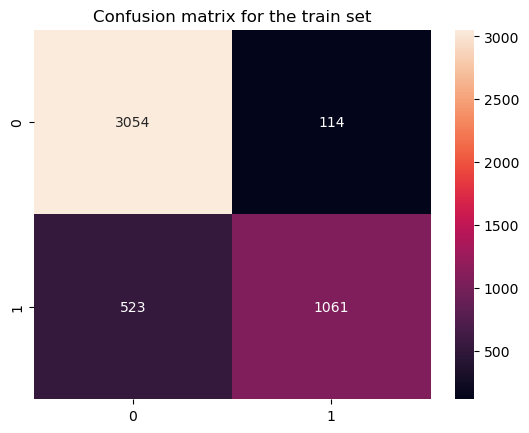

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

sns.heatmap(confusion_matrix(Y_train,lr_Y_train_pred),annot=True,fmt='d')
plt.title("Confusion matrix for the train set")
print('The accuracy score for train data is:',accuracy_score(Y_train,lr_Y_train_pred))
plt.show()

In [74]:
print(classification_report(Y_train,lr_Y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91      3168
           1       0.90      0.67      0.77      1584

    accuracy                           0.87      4752
   macro avg       0.88      0.82      0.84      4752
weighted avg       0.87      0.87      0.86      4752



The accuracy score for test data is: 0.8299180327868853


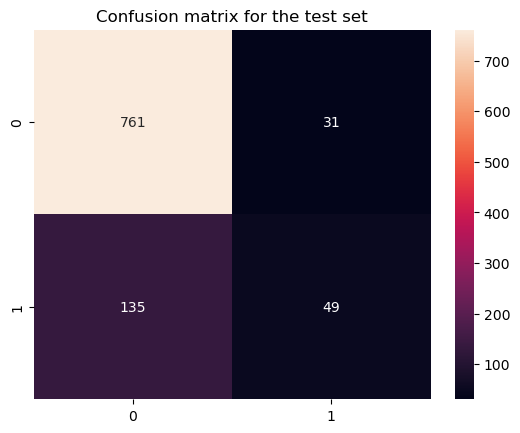

In [75]:
sns.heatmap(confusion_matrix(Y_test,lr_Y_test_pred),annot=True,fmt='d')
plt.title("Confusion matrix for the test set")
print('The accuracy score for test data is:',accuracy_score(Y_test,lr_Y_test_pred))

plt.show()

In [76]:
print(classification_report(Y_test,lr_Y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       792
           1       0.61      0.27      0.37       184

    accuracy                           0.83       976
   macro avg       0.73      0.61      0.64       976
weighted avg       0.80      0.83      0.80       976



Comments:
*  The accuracy on the train set is 85% and the accuracy on the test set is 83%. The difference is not to high so we can tell that it is a generalized model.

## 2. Decision tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [78]:
dtree_Y_train_pred=dtree.predict(X_train)
dtree_Y_test_pred=dtree.predict(X_test)

The accuracy score for train data is: 1.0


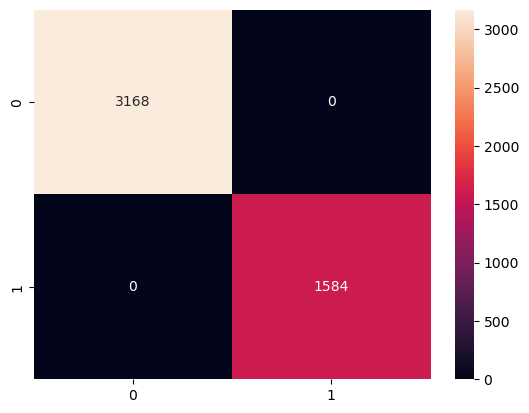

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

sns.heatmap(confusion_matrix(Y_train,dtree_Y_train_pred),annot=True,fmt='d')
print('The accuracy score for train data is:',accuracy_score(Y_train,dtree_Y_train_pred))

In [80]:
print(classification_report(Y_train,dtree_Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      1584

    accuracy                           1.00      4752
   macro avg       1.00      1.00      1.00      4752
weighted avg       1.00      1.00      1.00      4752



The accuracy score for test data is: 0.8360655737704918


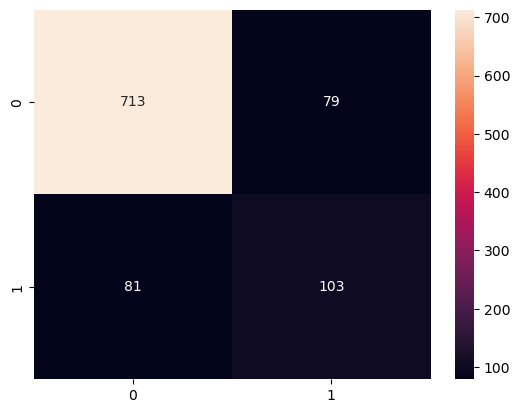

In [81]:
sns.heatmap(confusion_matrix(Y_test,dtree_Y_test_pred),annot=True,fmt='d')
print('The accuracy score for test data is:',accuracy_score(Y_test,dtree_Y_test_pred))

In [82]:
print(classification_report(Y_test,dtree_Y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       792
           1       0.57      0.56      0.56       184

    accuracy                           0.84       976
   macro avg       0.73      0.73      0.73       976
weighted avg       0.84      0.84      0.84       976



Comment:
*  The accuracy on the train set is 100% and the accuracy on the test set is 84%. Since the accuracy on the train set is much more so the model overfits.

Hyperparameter tuning :

In [83]:
from sklearn.model_selection import GridSearchCV

tuned_parameters=[{
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'max_features' : ['auto', 'sqrt']},]
dtree=DecisionTreeClassifier(random_state=42)
dtree_clf=GridSearchCV(dtree,tuned_parameters,cv=5)
dtree_clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_leaf': [1, 3, 5, 7, 10],
                          'min_samples_split': [2, 4, 6, 8, 10]}])

In [84]:
dtree_clf.best_params_


{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [85]:
dtree=DecisionTreeClassifier(max_depth=30, max_features='auto',min_samples_leaf=1,
                             min_samples_split=2, random_state=42)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=30, max_features='auto', random_state=42)

In [86]:
dtree_Y_train_pred=dtree.predict(X_train)
dtree_Y_test_pred=dtree.predict(X_test)

The accuracy score for train data is: 1.0


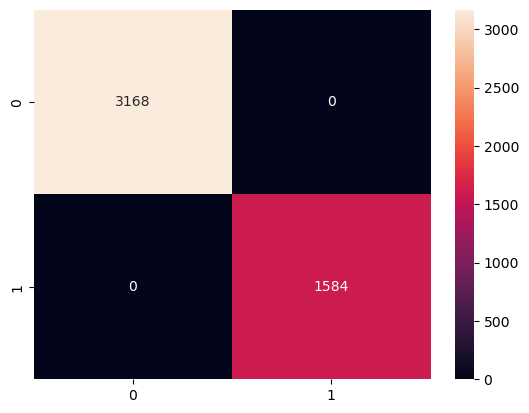

In [87]:
sns.heatmap(confusion_matrix(Y_train,dtree_Y_train_pred),annot=True,fmt='d')
print('The accuracy score for train data is:',accuracy_score(Y_train,dtree_Y_train_pred))

The accuracy score for test data is: 0.8206967213114754


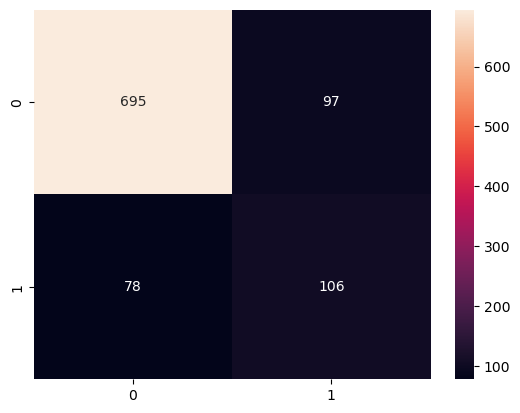

In [88]:
sns.heatmap(confusion_matrix(Y_test,dtree_Y_test_pred),annot=True,fmt='d')
print('The accuracy score for test data is:',accuracy_score(Y_test,dtree_Y_test_pred))

Comments:
* Still the model overfits.

## 3. Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [90]:
rf_pred_Y_train=rf.predict(X_train)
rf_pred_Y_test=rf.predict(X_test)

The accuracy score for train data is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      1584

    accuracy                           1.00      4752
   macro avg       1.00      1.00      1.00      4752
weighted avg       1.00      1.00      1.00      4752



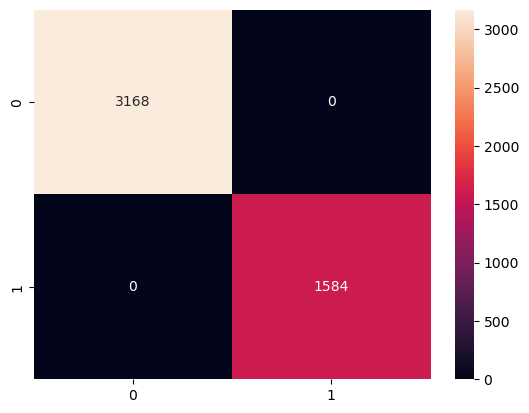

In [91]:
sns.heatmap(confusion_matrix(Y_train,rf_pred_Y_train),annot=True,fmt='d')
print('The accuracy score for train data is:',accuracy_score(Y_train,rf_pred_Y_train))
print(classification_report(Y_train,rf_pred_Y_train))

The accuracy score for train data is: 0.8801229508196722
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       792
           1       0.76      0.53      0.62       184

    accuracy                           0.88       976
   macro avg       0.83      0.74      0.78       976
weighted avg       0.87      0.88      0.87       976



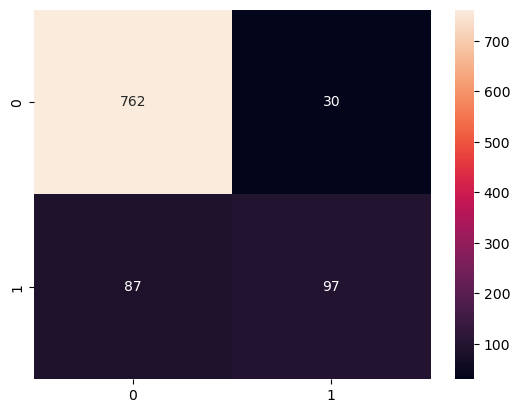

In [92]:
sns.heatmap(confusion_matrix(Y_test,rf_pred_Y_test),annot=True,fmt='d')
print('The accuracy score for train data is:',accuracy_score(Y_test,rf_pred_Y_test))
print(classification_report(Y_test,rf_pred_Y_test))

Comments:
* The accuracy on the train set is 100% and the accuracy on the test set is 88%. Since the accuracy on the train set is more so the model overfits.

Hyper parameter tuning :

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

tuned_parameters=[{'max_depth':[10,50,100,200],'n_estimators':[50,100,200,500],'max_features':['sqrt','auto']}]
rf=RandomForestClassifier(random_state=42)
rf_clf=GridSearchCV(rf,tuned_parameters,cv=5)
rf_clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [10, 50, 100, 200],
                          'max_features': ['sqrt', 'auto'],
                          'n_estimators': [50, 100, 200, 500]}])

In [94]:
rf_clf.best_params_

{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 200}

Fitting the model with the best set of parameters

In [95]:
rf=RandomForestClassifier(n_estimators=200,max_depth=50,max_features='sqrt',random_state=42)
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=50, max_features='sqrt', n_estimators=200,
                       random_state=42)

In [96]:
rf_pred_Y_train=rf.predict(X_train)


The accuracy score for train data is: 1.0


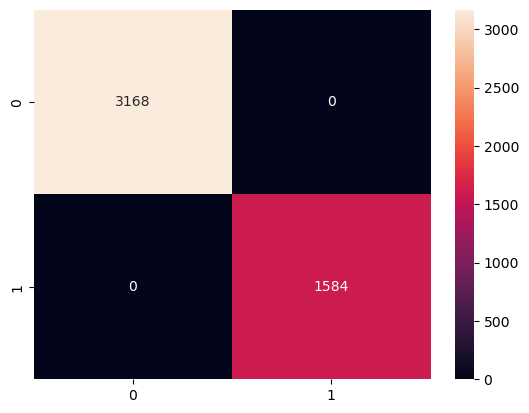

In [97]:
sns.heatmap(confusion_matrix(Y_train,rf_pred_Y_train),annot=True,fmt='d')
print('The accuracy score for train data is:',accuracy_score(Y_train,rf_pred_Y_train))

In [98]:
rf_pred_Y_test=rf.predict(X_test)

The accuracy score for train data is: 0.8842213114754098


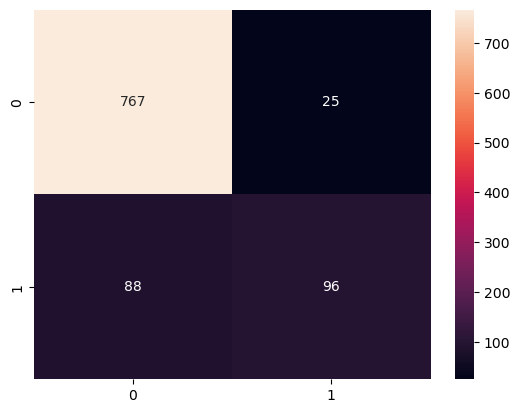

In [99]:
sns.heatmap(confusion_matrix(Y_test,rf_pred_Y_test),annot=True,fmt='d')
print('The accuracy score for train data is:',accuracy_score(Y_test,rf_pred_Y_test))

The model still overfits.

Selecting out the features which influences the attrition rate the most :

<AxesSubplot:xlabel='Importance', ylabel='Features'>

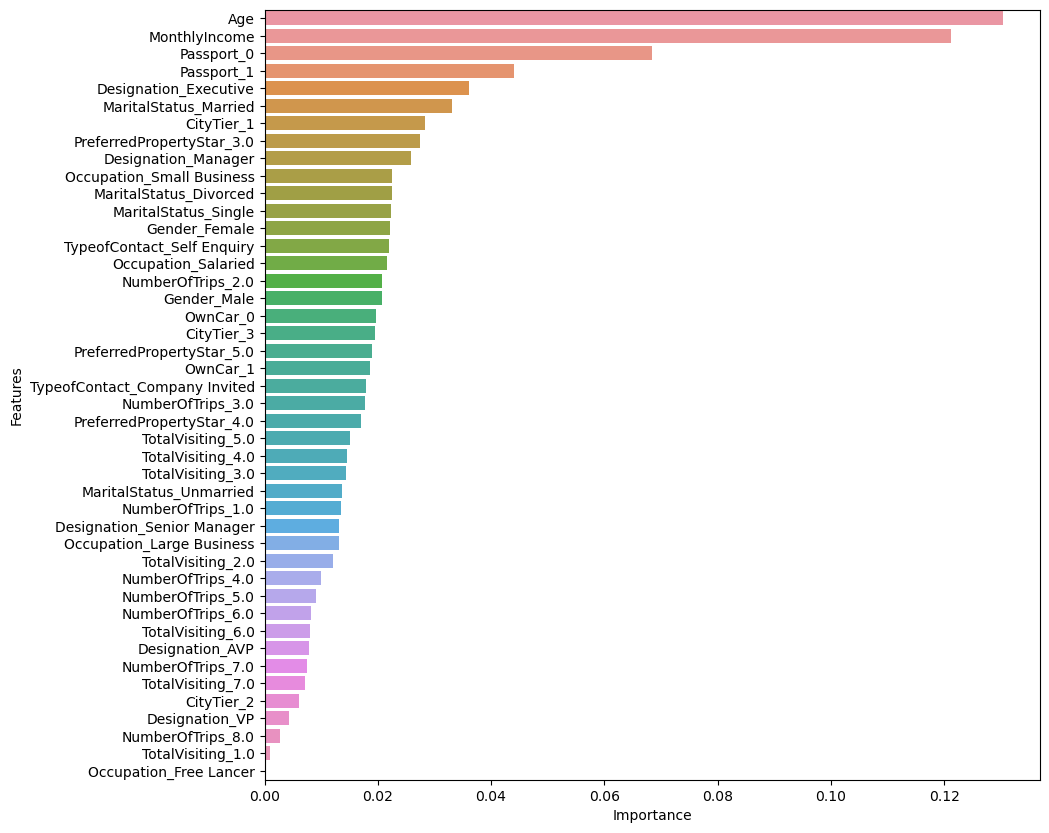

In [100]:
feature_rank=pd.DataFrame({'Features':X_train.columns,'Importance':rf.feature_importances_})
feature_rank=feature_rank.sort_values('Importance',ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y='Features',x='Importance',data=feature_rank)

## 4. SVM

In [101]:
from sklearn.svm import SVC

In [102]:
svm=SVC(random_state=42)
svm.fit(X_train,Y_train)

SVC(random_state=42)

In [103]:
svm_Y_train_pred=svm.predict(X_train)
svm_Y_test_pred=svm.predict(X_test)

The accuracy score for the train data : 0.905513468013468
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3168
           1       0.96      0.75      0.84      1584

    accuracy                           0.91      4752
   macro avg       0.92      0.87      0.89      4752
weighted avg       0.91      0.91      0.90      4752



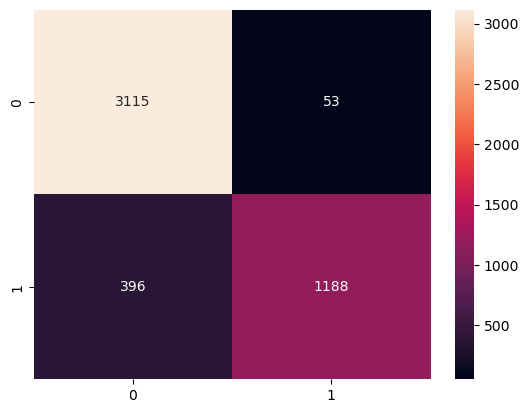

In [104]:
sns.heatmap(confusion_matrix(Y_train,svm_Y_train_pred),annot=True,fmt='d')
print('The accuracy score for the train data :',accuracy_score(Y_train,svm_Y_train_pred))
print(classification_report(Y_train,svm_Y_train_pred))

The accuracy score for the test data : 0.8545081967213115
              precision    recall  f1-score   support

           0       0.86      0.97      0.92       792
           1       0.75      0.34      0.47       184

    accuracy                           0.85       976
   macro avg       0.81      0.66      0.69       976
weighted avg       0.84      0.85      0.83       976



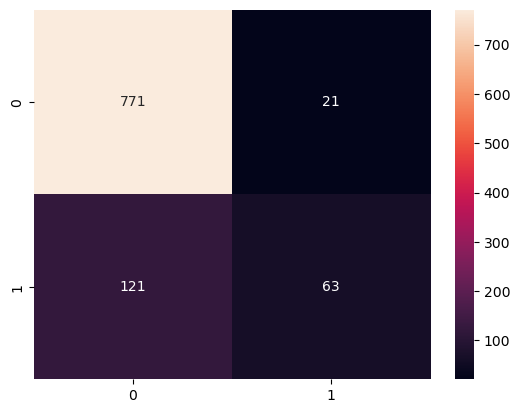

In [105]:
sns.heatmap(confusion_matrix(Y_test,svm_Y_test_pred),annot=True,fmt='d')
print('The accuracy score for the test data :',accuracy_score(Y_test,svm_Y_test_pred))
print(classification_report(Y_test,svm_Y_test_pred))

Comments:
* The accuracy on the train set is 90% and the accuracy on the test set is 85%. Since the difference between the two is not too much so it is a generalized model.

Hyper parameter tuning:

In [106]:
svm=SVC(random_state=42)

parameter_tuning=[{'C':[1,10,100],'kernel':['linear']},
                 {'C':[1,10,100],'gamma':[0.001,0.0001],'kernel':['rbf']}]

svm_clf=GridSearchCV(svm,parameter_tuning,scoring='roc_auc',cv=5)
svm_clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc')

Fitting the model with the best set of parameters.

In [107]:
svm=SVC(**svm_clf.best_params_,random_state=42)
svm.fit(X_train,Y_train)

SVC(C=100, gamma=0.001, random_state=42)

In [108]:
svm_Y_train_pred=svm.predict(X_train)
svm_Y_test_pred=svm.predict(X_test)

The accuracy score for the train data : 0.8535353535353535


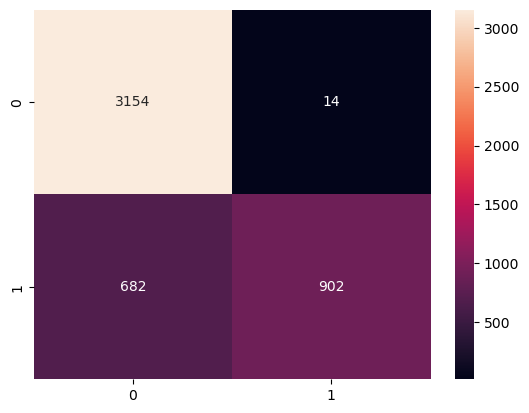

In [109]:
sns.heatmap(confusion_matrix(Y_train,svm_Y_train_pred),annot=True,fmt='d')
print('The accuracy score for the train data :',accuracy_score(Y_train,svm_Y_train_pred))

In [110]:
print(classification_report(Y_train,svm_Y_train_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      3168
           1       0.98      0.57      0.72      1584

    accuracy                           0.85      4752
   macro avg       0.90      0.78      0.81      4752
weighted avg       0.88      0.85      0.84      4752



The accuracy score for the test data : 0.8278688524590164


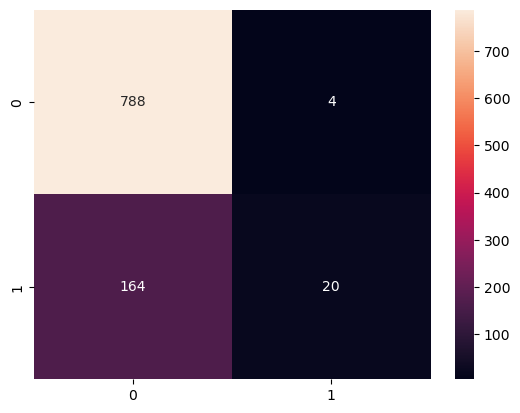

In [111]:
sns.heatmap(confusion_matrix(Y_test,svm_Y_test_pred),annot=True,fmt='d')
print('The accuracy score for the test data :',accuracy_score(Y_test,svm_Y_test_pred))

In [112]:
print(classification_report(Y_test,svm_Y_test_pred))


              precision    recall  f1-score   support

           0       0.83      0.99      0.90       792
           1       0.83      0.11      0.19       184

    accuracy                           0.83       976
   macro avg       0.83      0.55      0.55       976
weighted avg       0.83      0.83      0.77       976



Comments:
* A good model with accuracy 85% on the train data and 83% on the test data.

## 5. ANN

In [113]:
!pip install tensorflow 

import tensorflow as tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:0000:010:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.82.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.


In [114]:
ann_model= tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=500,activation='relu',input_shape= (44,)))
ann_model.add(tf.keras.layers.Dense(units=500,activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [115]:
ann_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               22500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
Total params: 273,501
Trainable params: 273,501
Non-trainable params: 0
_________________________________________________________________


In [116]:
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')


In [117]:
epochs=ann_model.fit(X_train,Y_train,epochs=100,batch_size=25)

Epoch 1/100
191/191 [==============================] - 2s 6ms/step - loss: 0.4573 - accuracy: 0.7906
Epoch 2/100
191/191 [==============================] - 1s 6ms/step - loss: 0.3417 - accuracy: 0.8592
Epoch 3/100
191/191 [==============================] - 1s 6ms/step - loss: 0.2849 - accuracy: 0.8767
Epoch 4/100
191/191 [==============================] - 1s 5ms/step - loss: 0.2435 - accuracy: 0.8973
Epoch 5/100
191/191 [==============================] - 1s 6ms/step - loss: 0.2027 - accuracy: 0.9192
Epoch 6/100
191/191 [==============================] - 1s 6ms/step - loss: 0.1837 - accuracy: 0.9234
Epoch 7/100
191/191 [==============================] - 1s 6ms/step - loss: 0.1458 - accuracy: 0.9442
Epoch 8/100
191/191 [==============================] - 1s 5ms/step - loss: 0.1253 - accuracy: 0.9491
Epoch 9/100
191/191 [==============================] - 1s 5ms/step - loss: 0.1118 - accuracy: 0.9583
Epoch 10/100
191/191 [==============================] - 1s 6ms/step - loss: 0.1018 - accura

In [118]:
Y_pred=ann_model.predict(X_train)
Y_pred = (Y_pred>0.5)

149/149 [==============================] - 0s 2ms/step


Accuracy 99.81060606060606 %


<AxesSubplot:>

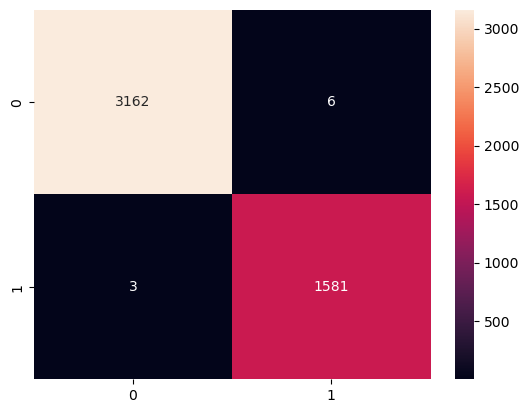

In [119]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(Y_train,Y_pred)
print('Accuracy {} %'.format(100* accuracy_score(Y_pred,Y_train)))

sns.heatmap(cm,annot=True, fmt='d')

In [120]:
Y_pred=ann_model.predict(X_test)
Y_pred = (Y_pred>0.5)

31/31 [==============================] - 0s 2ms/step


Accuracy 88.72950819672131 %


<AxesSubplot:>

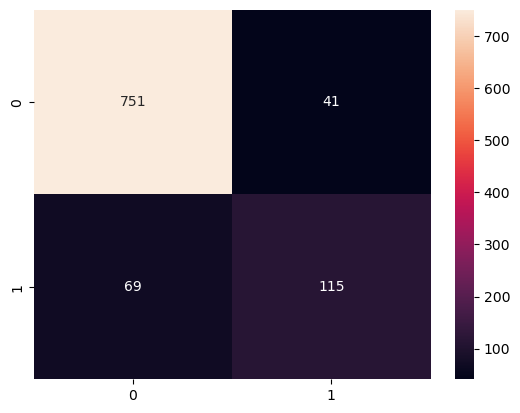

In [121]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(Y_test,Y_pred)
print('Accuracy {} %'.format(100* accuracy_score(Y_pred,Y_test)))

sns.heatmap(cm,annot=True, fmt='d')

Comments :
* This model shows 100% accuracy on the train set and 89% accuracy on the test set.

# Conclusions

The model that produced the best result is the SVM model with an accuracy of 83%, which was achieved after hyperparameter tuning by considering other metrics values.Also it is a generalized model. This model will be used to analyze the most dominant features to gain insights, and the model's prediction results will be used as a reference for our business.

In [122]:
feature_names =X_train.columns

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(svm, scoring='accuracy', random_state=42).fit(X_test, Y_test, labels=[1])
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1381 ± 0.0065,OwnCar_1
0.1225 ± 0.0165,OwnCar_0
0.1055 ± 0.0158,MaritalStatus_Married
0.0719 ± 0.0064,MaritalStatus_Divorced
0.0670 ± 0.0095,TotalVisiting_5.0
0.0615 ± 0.0138,Passport_0
0.0594 ± 0.0085,TotalVisiting_3.0
0.0455 ± 0.0054,TotalVisiting_4.0
0.0375 ± 0.0115,TypeofContact_Self Enquiry
0.0369 ± 0.0098,PreferredPropertyStar_3.0


So we got the important variables which might effect the rate of purchase. Thus we will focus on the people having these features for marketing.